In [53]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os
import zipfile
import xarray as xr
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.x13 import x13_arima_analysis
from statsmodels.tsa.filters.hp_filter import hpfilter
import pywt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import kstest, probplot, invgamma, expon, gamma, lognorm, norm, halfnorm, halfcauchy, pareto, uniform, triang, boxcox
from sklearn.preprocessing import PowerTransformer
from matplotlib.patches import Patch
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [5]:
folder = '/Users/avalottig/Desktop/Computer-Science-MSc/ADIA-Project/Code/MScProject/data/ERA5/2020-2021'
months = ['January2020', 'February2020', 'March2020', 'April2020', 'May2020', 'June2020', 
          'July2020', 'August2020', 'September2020', 'October2020', 'November2020', 'December2020', 
          'January2021', 'February2021', 'March2021', 'April2021', 'May2021', 'June2021', 
          'July2021', 'August2021', 'September2021', 'October2021', 'November2021', 'December2021', 
          'January2022', 'February2022', 'March2022', 'April2022', 'May2022', 'June2022', 
          'July2022', 'August2022', 'September2022', 'October2022', 'November2022', 'December2022', 
          'January2023', 'February2023', 'March2023', 'April2023', 'May2023', 'June2023', 
          'July2023', 'August2023', 'September2023', 'October2023', 'November2023', 'December2023']
precip_data = []

for month in months:
    zip_path = os.path.join(folder, month, [f for f in os.listdir(os.path.join(folder, month)) if f.endswith('.zip')][0])
    name = 'data.nc'
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extract(name)
    
    path = os.path.join(os.getcwd(), name)
    
    try:
        ds = xr.open_dataset(path, engine='scipy')
        print(f"Loaded data for {month}")
    except Exception as e:
        print(f"Error opening dataset for {month}: {e}")
        continue

    precip = ds['tp'].sel(latitude=41.948936, longitude=-93.687760, method='nearest').to_dataframe()
    precip_data.append(precip)
    os.remove(path)

precip = pd.concat(precip_data)
precip.index = pd.to_datetime(precip.index)
print(precip.head())



Loaded data for January2020
Loaded data for February2020
Loaded data for March2020
Loaded data for April2020
Loaded data for May2020
Loaded data for June2020
Loaded data for July2020
Loaded data for August2020
Loaded data for September2020
Loaded data for October2020
Loaded data for November2020
Loaded data for December2020
Loaded data for January2021
Loaded data for February2021
Loaded data for March2021
Loaded data for April2021
Loaded data for May2021
Loaded data for June2021
Loaded data for July2021
Loaded data for August2021
Loaded data for September2021
Loaded data for October2021
Loaded data for November2021
Loaded data for December2021
Loaded data for January2022
Loaded data for February2022
Loaded data for March2022
Loaded data for April2022
Loaded data for May2022
Loaded data for June2022
Loaded data for July2022
Loaded data for August2022
Loaded data for September2022
Loaded data for October2022
Loaded data for November2022
Loaded data for December2022
Loaded data for Januar

                     longitude   latitude  soil_moisture
date                                                    
2020-01-01 00:00:00  -93.68776  41.948936       0.303247
2020-01-01 03:00:00  -93.68776  41.948936       0.303799
2020-01-01 06:00:00  -93.68776  41.948936       0.304232
2020-01-01 09:00:00  -93.68776  41.948936       0.304705
2020-01-01 12:00:00  -93.68776  41.948936       0.305738


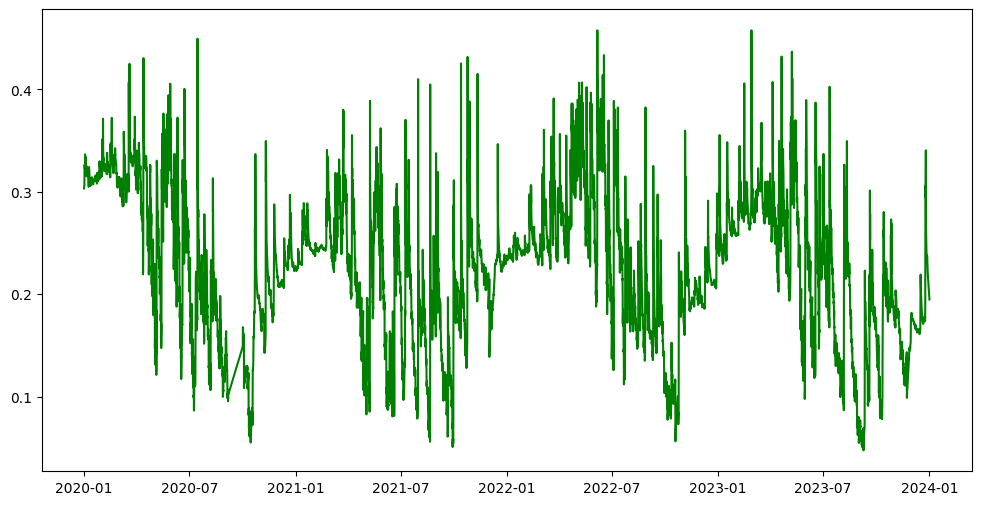

In [15]:
lat = 41.948936
lon = -93.687760

sm_path = '/Users/avalottig/Desktop/Computer-Science-MSc/ADIA-Project/Code/MScProject/data/SPL4SMAU_2020/smap_iowa_2020_2024_surface.csv'
sm = pd.read_csv(sm_path, parse_dates=['date'])
sm.set_index('date', inplace=True)
sm['soil_moisture'] = pd.to_numeric(sm['soil_moisture'])
sm_data = sm[(sm['latitude'] == lat) & (sm['longitude'] == lon)]
print(sm_data.head())
plt.figure(figsize=(12, 6))
plt.plot(sm_data.index, sm_data['soil_moisture'], label='Soil Moisture', color='green')

Test out different ways of aggregating the time series:
    1. Adjust intervals
    2. Take mean of each interval


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


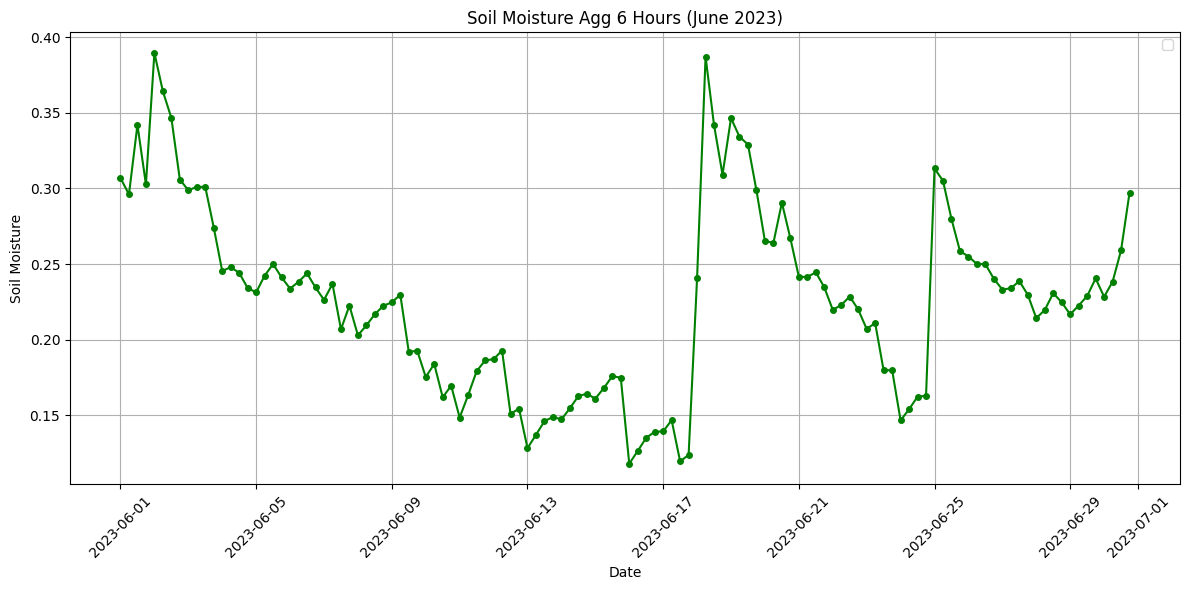

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


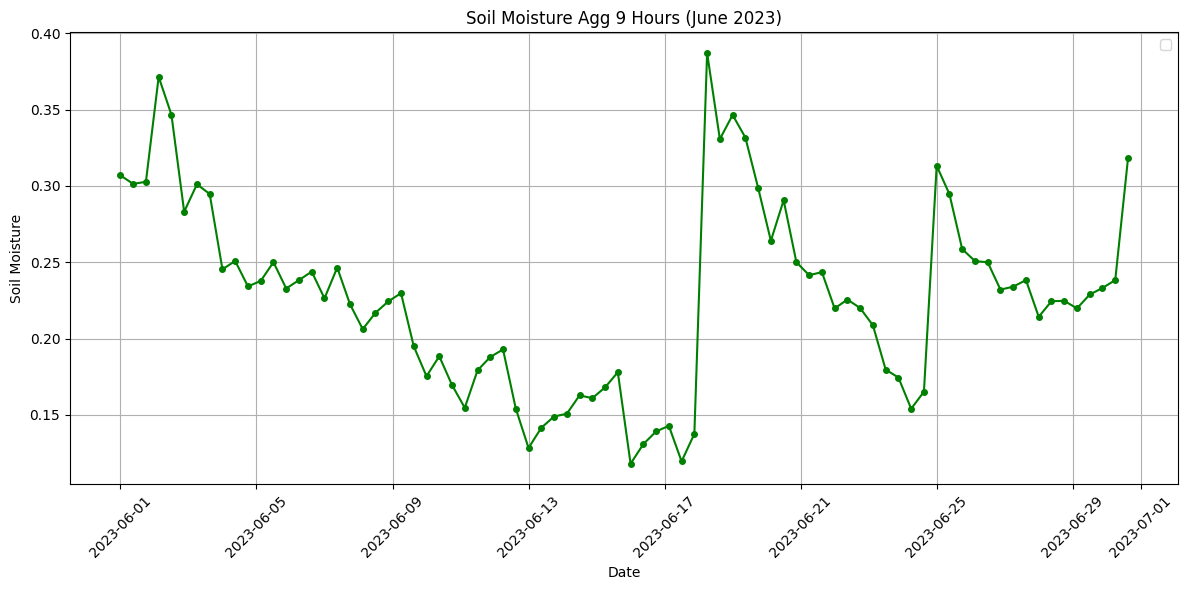

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


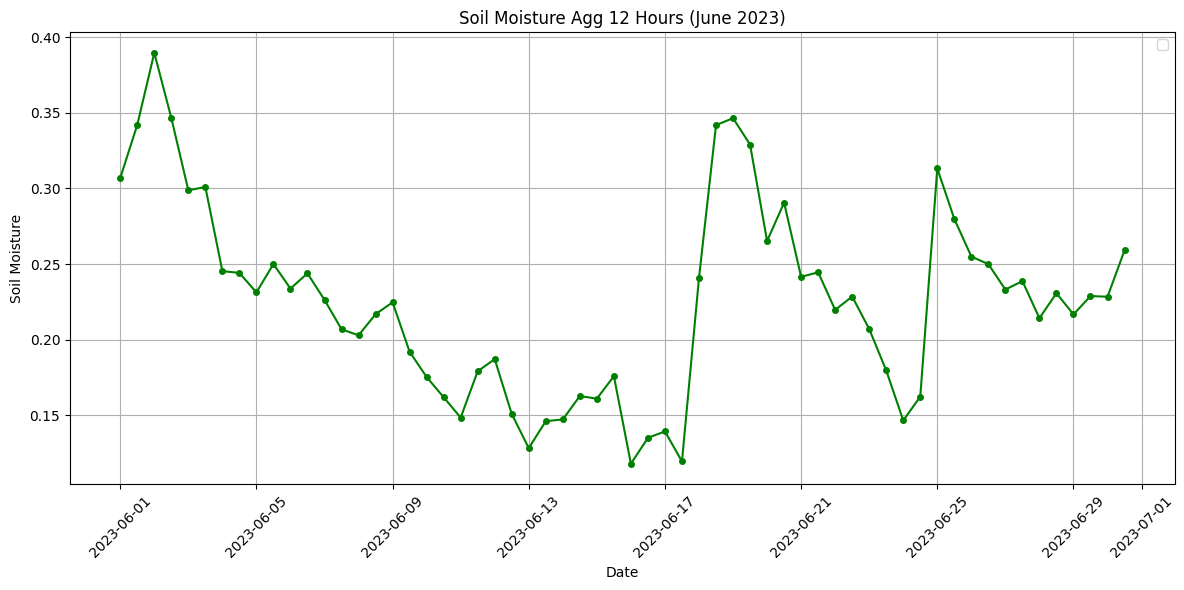

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


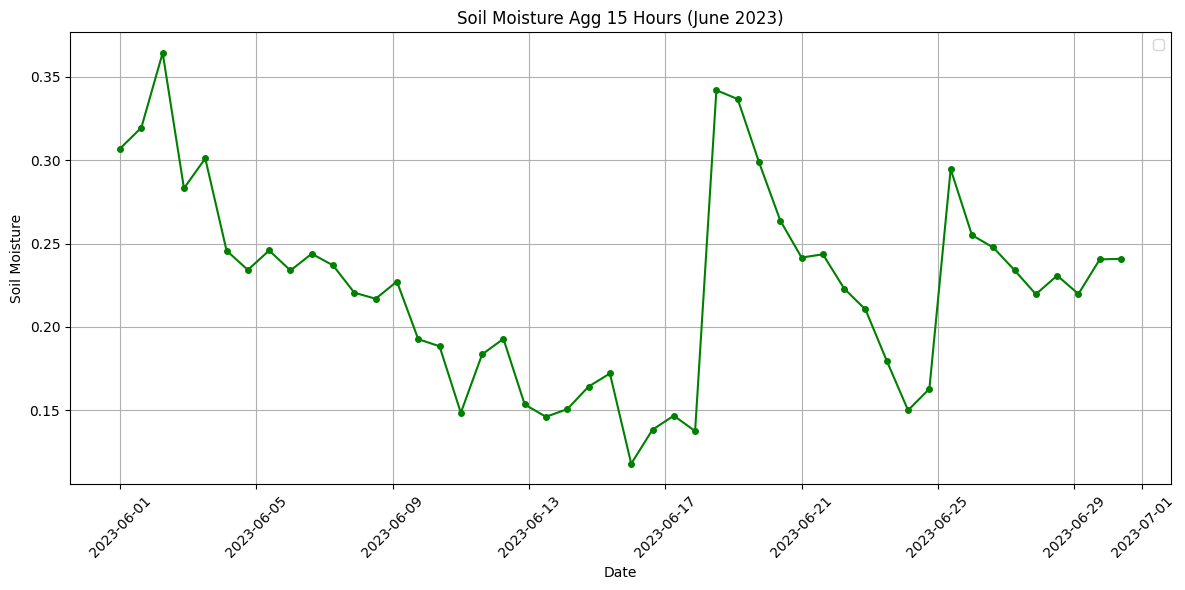

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


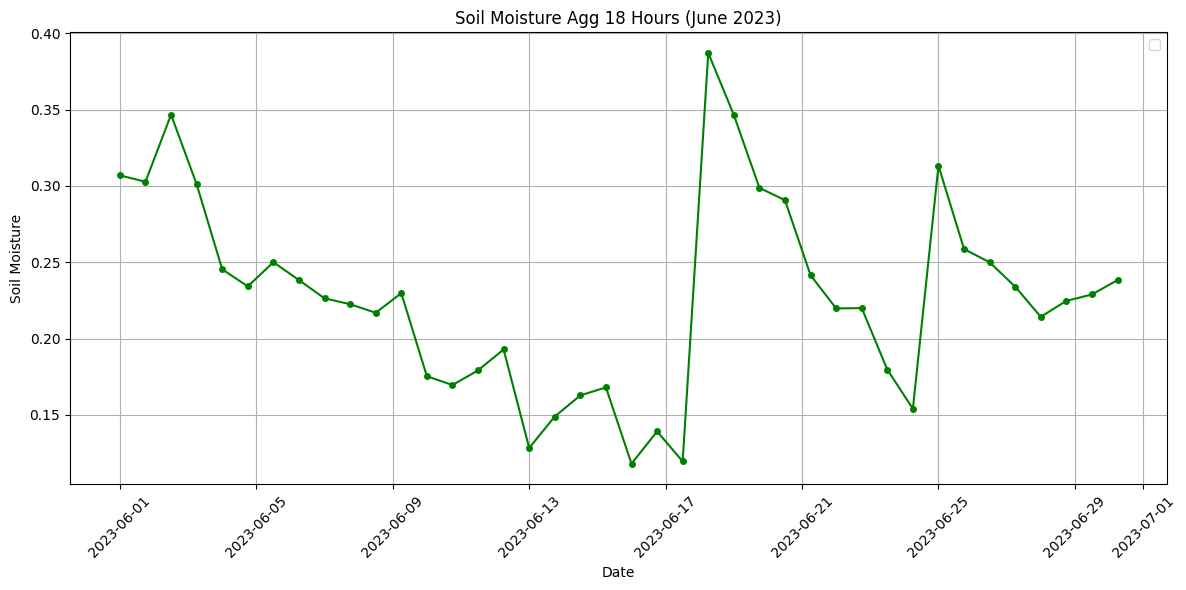

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


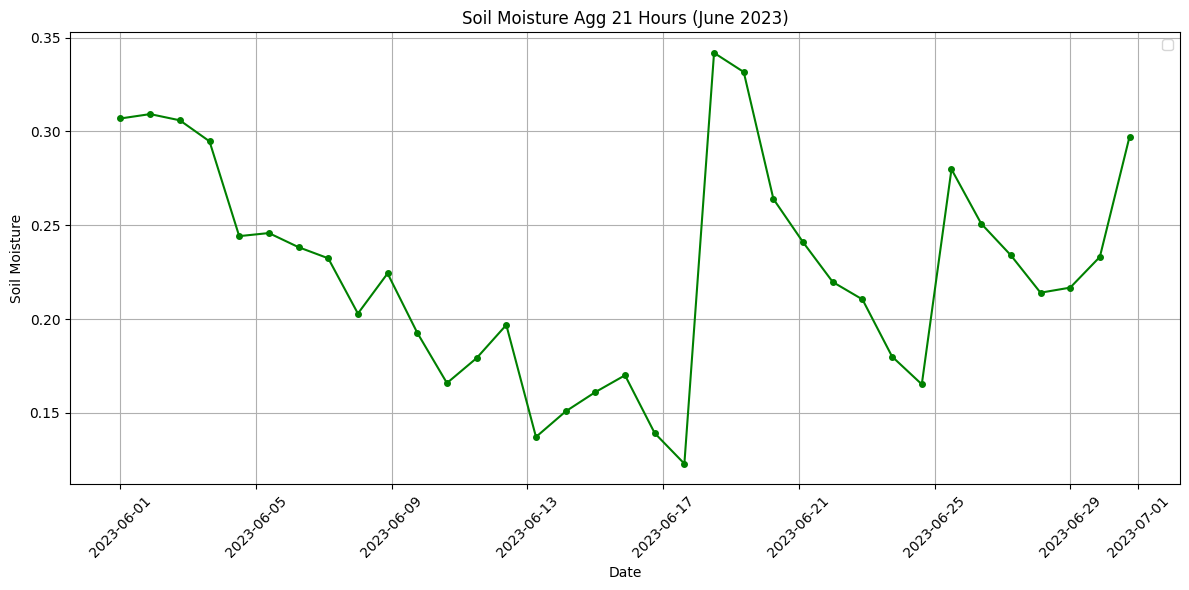

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


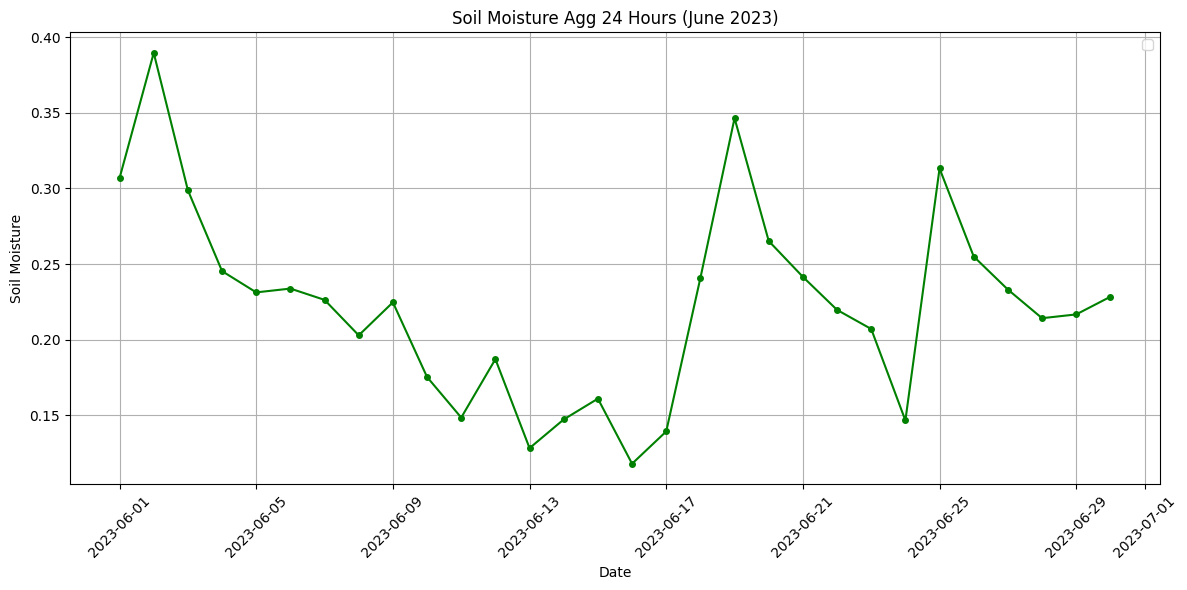

In [16]:
june_2023 = sm_data[(sm_data.index >= '2023-06-01') & (sm_data.index < '2023-07-01')]

for i in range(2, 9):
    plt.figure(figsize=(12, 6))
    sampled_data = june_2023.iloc[::i].copy()  
    plt.plot(sampled_data.index, sampled_data['soil_moisture'], marker='o', linestyle='-', markersize=4, color='green')
    
    plt.title(f'Soil Moisture Agg {i*3} Hours (June 2023)')
    plt.xlabel('Date')
    plt.ylabel('Soil Moisture')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/var/folders/rl/9q_x7dw54pxf8fg3ycvj030c0000gn/T/ipykernel_33537/1687030996.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = june_2023['soil_moisture'].resample(f'{i}H').mean()


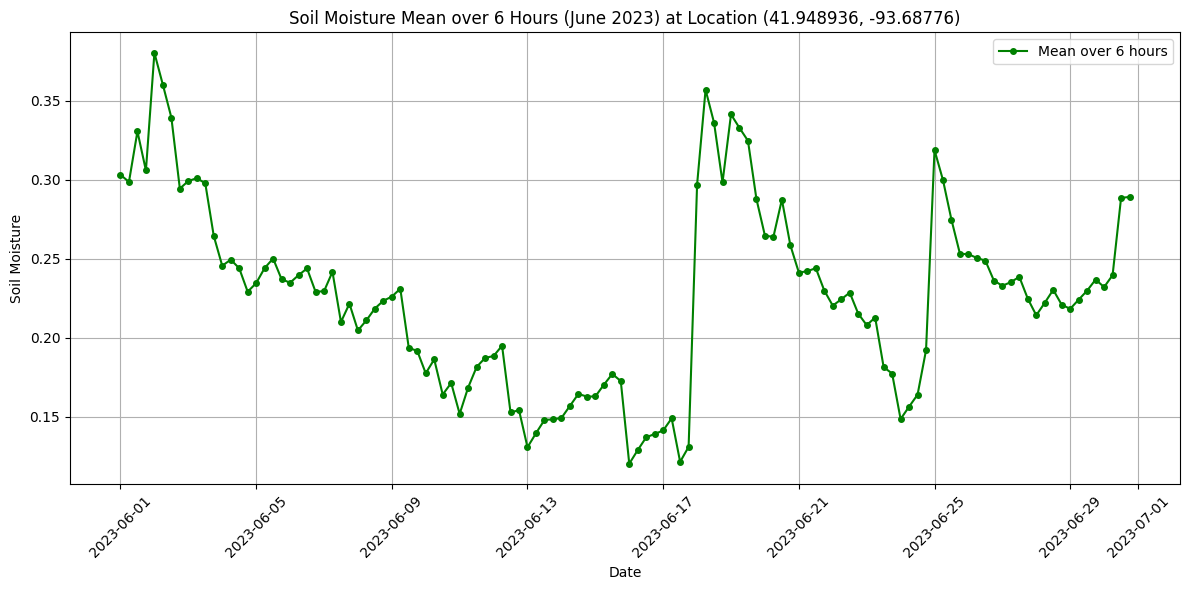

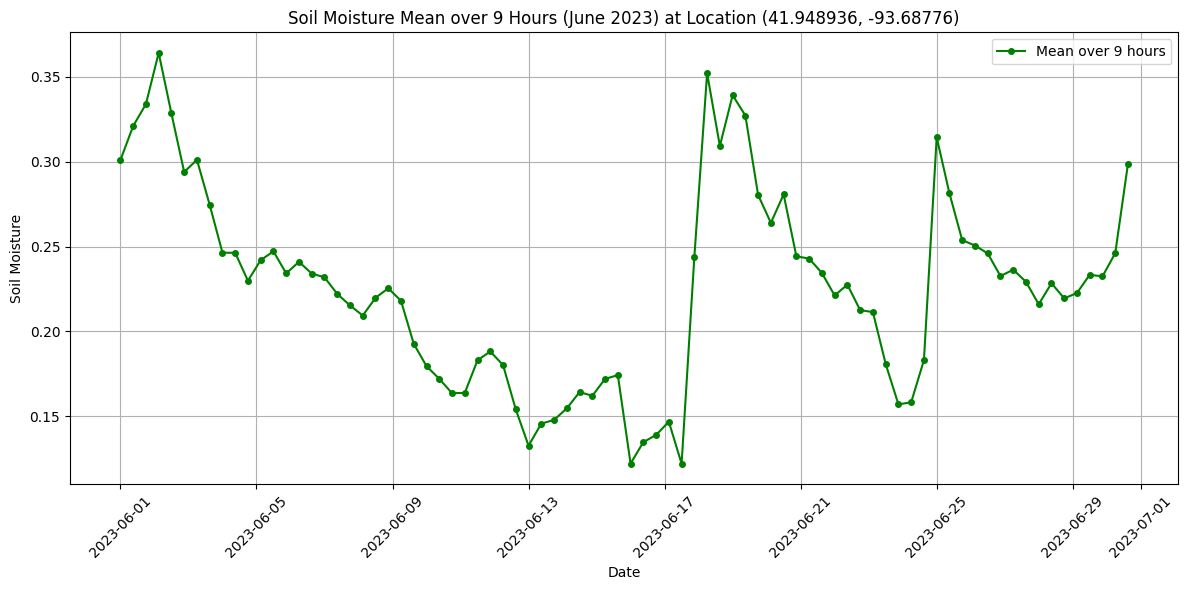

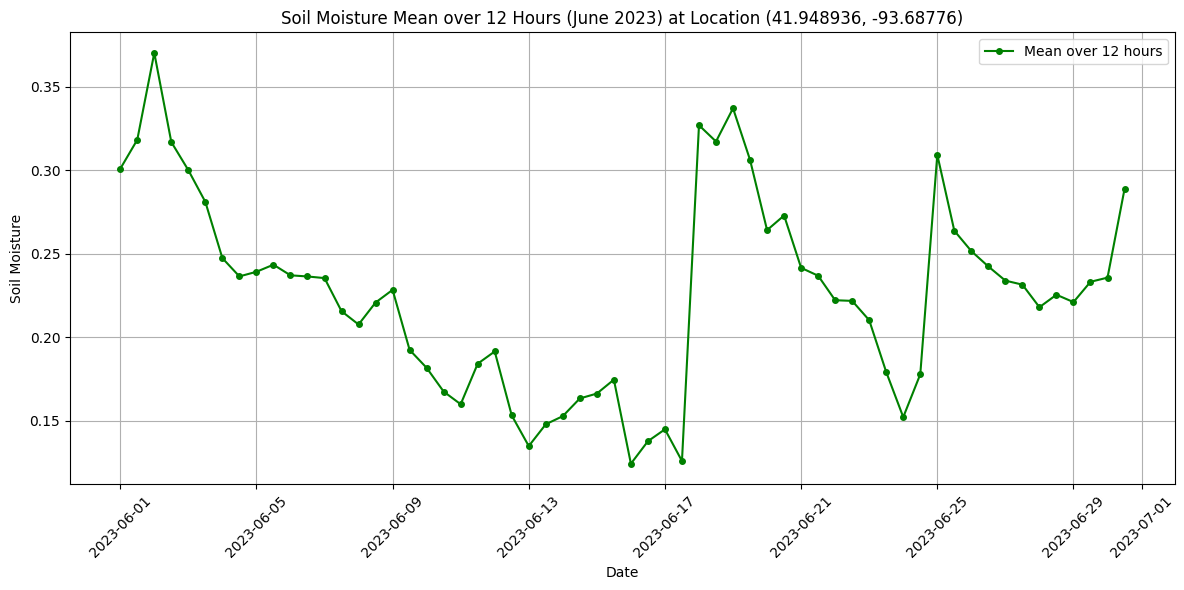

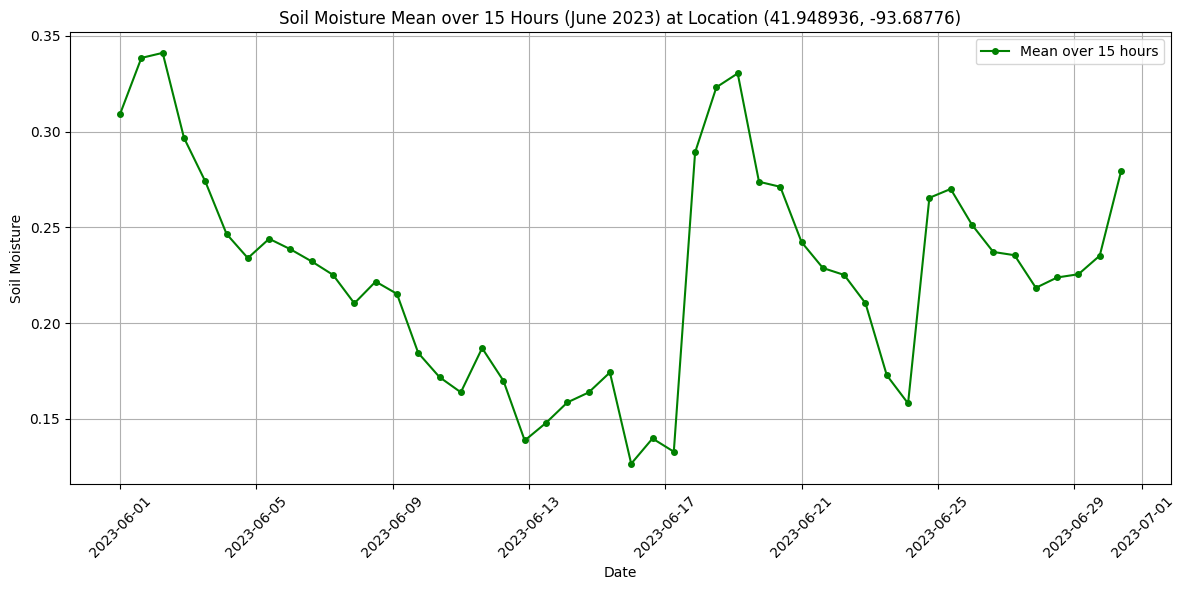

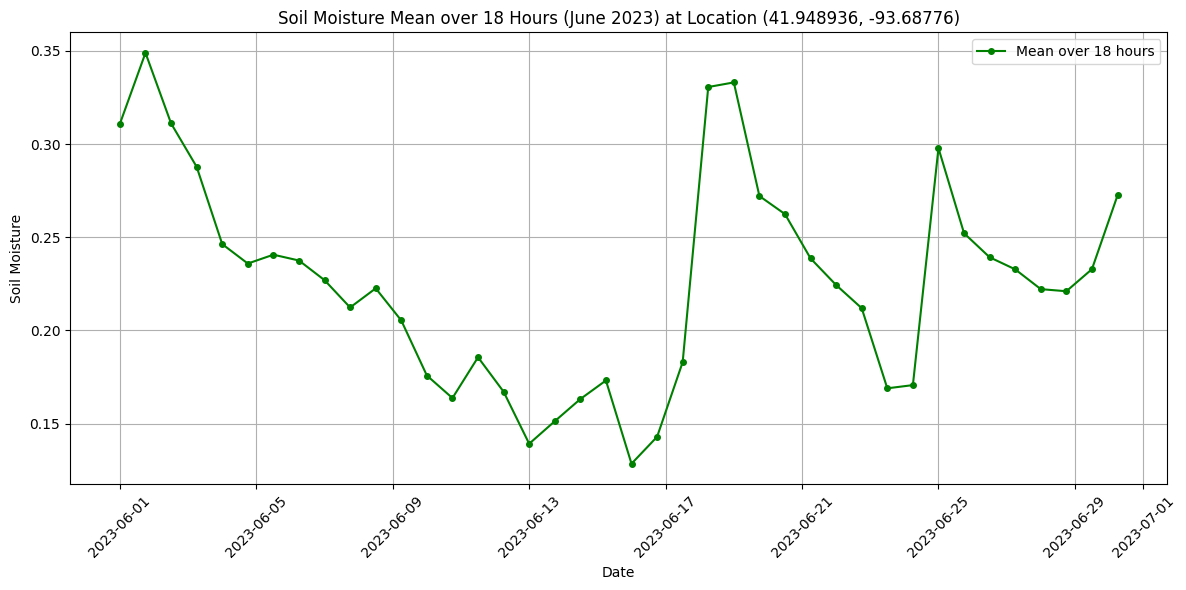

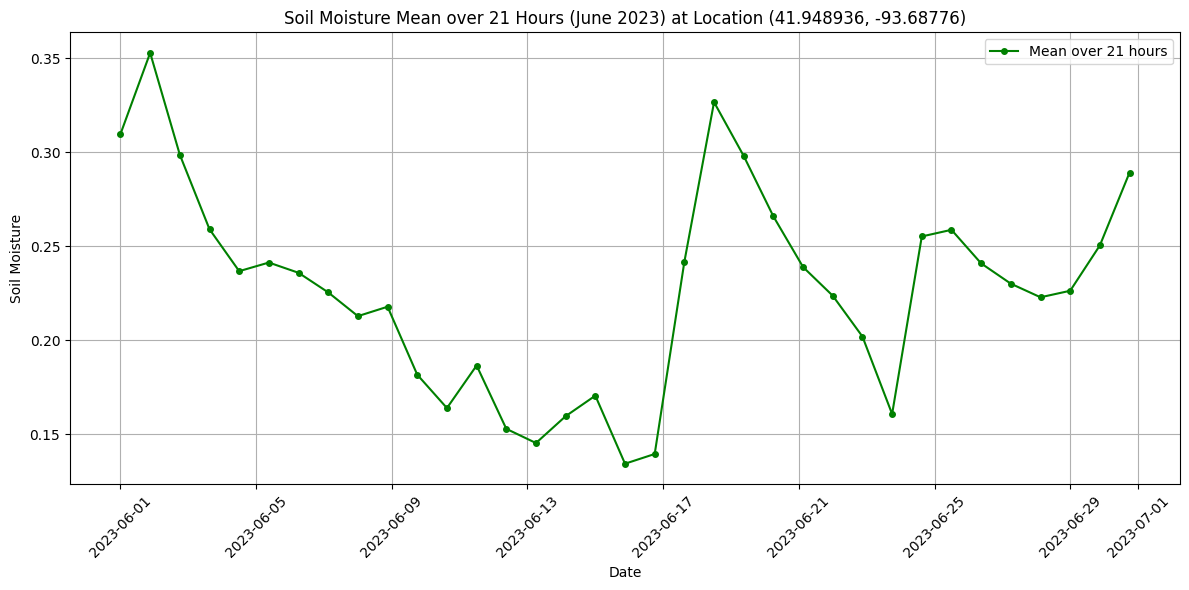

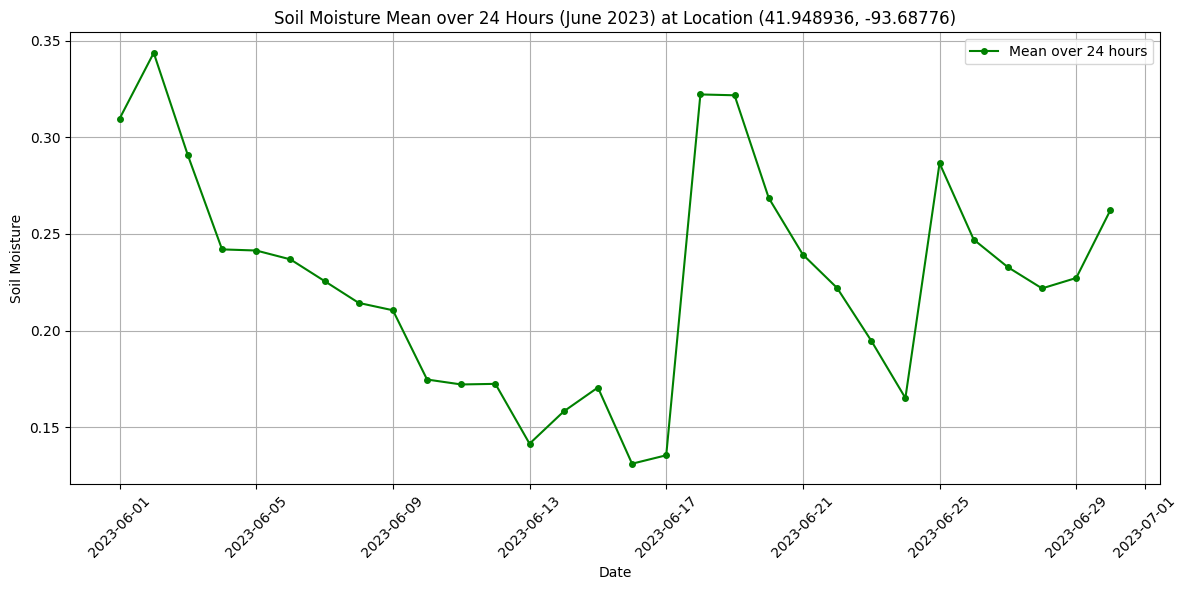

In [18]:
intervals = [6, 9, 12, 15, 18, 21, 24]

for i in intervals:
    resampled = june_2023['soil_moisture'].resample(f'{i}H').mean()  
    plt.figure(figsize=(12, 6))
    plt.plot(resampled.index, resampled.values, marker='o', linestyle='-', markersize=4, label=f'Mean over {i} hours', color='green')
    
    plt.title(f'Soil Moisture Mean over {i} Hours (June 2023) at Location {lat, lon}')
    plt.xlabel('Date')
    plt.ylabel('Soil Moisture')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [19]:
precipitation = pd.concat(precip_data)
precipitation.index = pd.to_datetime(precipitation.index)
precipitation = precipitation[precipitation['tp'] > 0]

low_threshold = (0, 0.002)
medium_threshold = (0.002, 0.02)
high_threshold = (0.02, np.inf)



In [22]:
low_data = precipitation[(precipitation['tp'] >= low_threshold[0]) & (precipitation['tp'] < low_threshold[1])]['tp']
medium_data = precipitation[(precipitation['tp'] >= medium_threshold[0]) & (precipitation['tp'] < medium_threshold[1])]['tp']
high_data = precipitation[precipitation['tp'] >= high_threshold[0]]['tp']

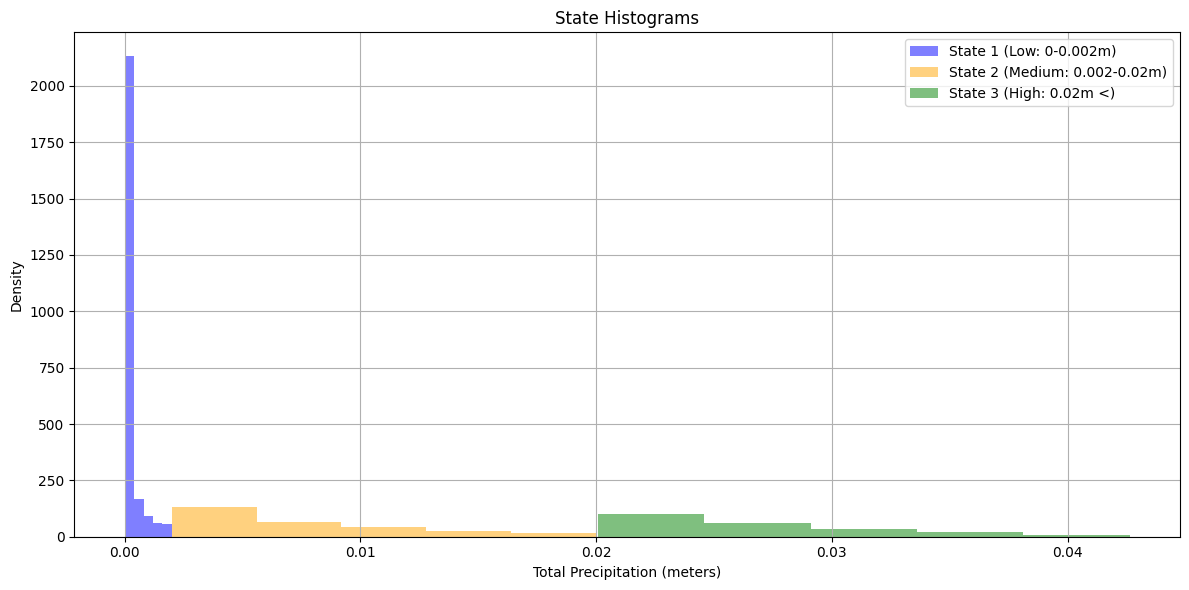

In [23]:
plt.figure(figsize=(12, 6))
plt.hist(low_data, 
         bins=5, alpha=0.5, label='State 1 (Low: 0-0.002m)', color='blue', density=True)
plt.hist(medium_data, 
         bins=5, alpha=0.5, label='State 2 (Medium: 0.002-0.02m)', color='orange', density=True)
plt.hist(high_data, 
         bins=5, alpha=0.5, label='State 3 (High: 0.02m <)', color='green', density=True)
plt.title('State Histograms')
plt.xlabel('Total Precipitation (meters)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

distributon State 1: gamma_log
params: (0.23521134516245507, 8.6736173798840345e-19, 0.0013091991441204548)
K-S : 0.20312058531832805, p-value: 0.0
AIC: -534165.663466767, BIC: -534141.7386944595

distributon State 2: gamma_log
params: (0.9667666707623128, 0.0019994811065365274, 0.005327412674808729)
K-S : 0.04729440245086014, p-value: 1.4976957715391772e-07
AIC: -31262.439519455475, BIC: -31243.824683960418

distributon State 3: halfnorm_log
params: (0.019875143516347414, 0.008047128485047753)
K-S : 0.06301742166765534, p-value: 0.1055243322101922
AIC: -2986.553484186761, BIC: -2978.7536894795962



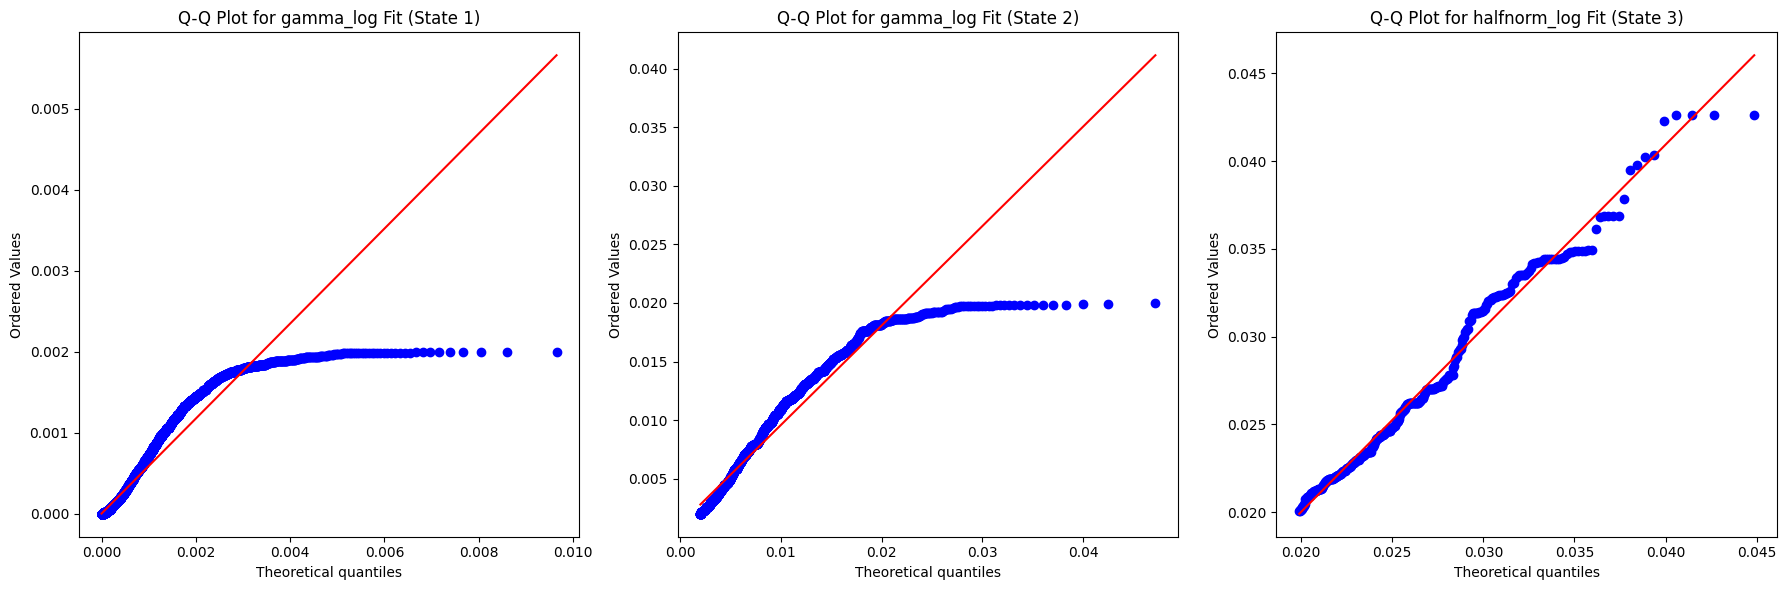

In [27]:
l_data = low_data.values
m_data = medium_data.values
h_data = high_data.values

def fit(data, distribution, name, transformation=None):
    if len(data) == 0:
        print(f"No data available for {name}")
        return None, None, None, None, None

    transformed = data.copy()

    if transformation == 'log':
        if np.any(data <= 0):
            return None, None, None, None, None
        transformed = np.log1p(data)  
    elif transformation == 'boxcox':
        if np.any(data <= 0):
            transformed+= 1e-9  
        transformed, _ = boxcox(transformed)

    params = distribution.fit(transformed)
    ks_stat, ks_pval = kstest(transformed, dist_name, args=params)
    aic, bic = calculate_aic_bic(transformed, distribution, params)
    return params, ks_stat, ks_pval, aic, bic

def calculate_aic_bic(data, distribution, params):
    log_likelihood = np.sum(distribution.logpdf(data, *params))
    k = len(params)
    n = len(data)
    aic = 2 * k - 2 * log_likelihood
    bic = k * np.log(n) - 2 * log_likelihood
    return aic, bic

distributions = {
    'expon': expon,
    'gamma': gamma,
    'norm': norm,
    'lognorm': lognorm,
    'halfnorm': halfnorm,
    'halfcauchy': halfcauchy,
    'pareto': pareto,
    'invgamma': invgamma,
    'uniform': uniform,
    'triang': triang
}

transformations = [None, 'log', 'boxcox']
fit_results = {}
for state, data in zip(['State 1', 'State 2', 'State 3'], [l_data, m_data, h_data]):
    fit_results[state] = {}
    for transformation in transformations:
        for dist_name, distribution in distributions.items():
            params, ks_stat, ks_pval, aic, bic = fit(data, distribution, dist_name, transformation=transformation)
            if params is not None:
                fit_results[state][f"{dist_name}_{transformation or 'none'}"] = {
                    'params': params, 'ks_stat': ks_stat, 'ks_pval': ks_pval, 'aic': aic, 'bic': bic
                }
best_fits = {}
for state in fit_results:
    best_fit = min(fit_results[state], key=lambda k: fit_results[state][k]['aic'])
    best_fits[state] = best_fit

for state in best_fits:
    fit_info = fit_results[state][best_fits[state]]
    print(f"distributon {state}: {best_fits[state]}")
    print(f"params: {fit_info['params']}")
    print(f"K-S : {fit_info['ks_stat']}, p-value: {fit_info['ks_pval']}")
    print(f"AIC: {fit_info['aic']}, BIC: {fit_info['bic']}\n")


plt.figure(figsize=(18, 6))
plt.subplot(131)
probplot(low_data, dist=best_fits['State 1'].split('_')[0], sparams=fit_results['State 1'][best_fits['State 1']]['params'], plot=plt)
plt.title(f"Q-Q Plot for {best_fits['State 1']} Fit (State 1)")
plt.subplot(132)
probplot(medium_data, dist=best_fits['State 2'].split('_')[0], sparams=fit_results['State 2'][best_fits['State 2']]['params'], plot=plt)
plt.title(f"Q-Q Plot for {best_fits['State 2']} Fit (State 2)")
plt.subplot(133)
probplot(high_data, dist=best_fits['State 3'].split('_')[0], sparams=fit_results['State 3'][best_fits['State 3']]['params'], plot=plt)
plt.title(f"Q-Q Plot for {best_fits['State 3']} Fit (State 3)")

plt.tight_layout()
plt.show()


In [83]:
state_counts = np.array([len(low_data), len(medium_data), len(high_data)])
pi = state_counts / np.sum(state_counts)
print("State Priors:", pi)

State Priors: [0.84222701 0.14346207 0.01431092]


In [32]:
def p_y_given_x_gamma_state1(y, params):
    return gamma.pdf(y, *params)

def p_y_given_x_gamma_state2(y, params):
    return gamma.pdf(y, *params)

def p_y_given_x_halfnorm_state3(y, params):
    return halfnorm.pdf(y, *params)


params_gamma_state1 = (0.23504218627573403, 8.673617379884023e-19, 0.0013105948737896131)
params_gamma_state2 = (0.9695959581723379, 0.0020014814018462826, 0.005311010826654878)
params_halfnorm_state3 = (0.020073969226523, 0.008261645699728669)

In [84]:
pi = np.array([0.84222701, 0.14346207, 0.01431092])

M = np.array([[0.8, 0.1, 0.1],
              [0.1, 0.8, 0.1],
              [0.1, 0.1, 0.8]])

def p_y_given_x_gamma(y, params):
    return gamma.pdf(y, *params)

def p_y_given_x_halfnorm(y, params):
    return halfnorm.pdf(y, *params)

alpha = np.zeros((len(precipitation['tp']), 3))

for si in range(3):
    if si == 0:
        alpha[0, si] = pi[si] * p_y_given_x_gamma(precipitation['tp'].iloc[0], params_gamma_state1)
    elif si == 1:
        alpha[0, si] = pi[si] * p_y_given_x_gamma(precipitation['tp'].iloc[0], params_gamma_state2)
    else:
        alpha[0, si] = pi[si] * p_y_given_x_halfnorm(precipitation['tp'].iloc[0], params_halfnorm_state3)

alpha[0] /= np.sum(alpha[0])
#print("Initial alpha values:", alpha[0])

for t in range(1, len(precipitation['tp'])):
    for sj in range(3):
        if sj == 0:
            p_y_given_x = p_y_given_x_gamma(precipitation['tp'].iloc[t], params_gamma_state1)
        elif sj == 1:
            p_y_given_x = p_y_given_x_gamma(precipitation['tp'].iloc[t], params_gamma_state2)
        else:
            p_y_given_x = p_y_given_x_halfnorm(precipitation['tp'].iloc[t], params_halfnorm_state3)

        alpha[t, sj] = p_y_given_x * np.sum([alpha[t-1, si] * M[si, sj] for si in range(3)])
    
    alpha[t] /= np.sum(alpha[t])
    print(f"Alpha values at t= {t}:", alpha[t])
states_seq = np.argmax(alpha, axis=1) + 1  

print("Most likely state sequence:", states_seq)


Alpha values at t= 1: [1. 0. 0.]
Alpha values at t= 2: [1. 0. 0.]
Alpha values at t= 3: [1. 0. 0.]
Alpha values at t= 4: [1. 0. 0.]
Alpha values at t= 5: [1. 0. 0.]
Alpha values at t= 6: [1. 0. 0.]
Alpha values at t= 7: [1. 0. 0.]
Alpha values at t= 8: [1. 0. 0.]
Alpha values at t= 9: [1. 0. 0.]
Alpha values at t= 10: [1. 0. 0.]
Alpha values at t= 11: [1. 0. 0.]
Alpha values at t= 12: [1. 0. 0.]
Alpha values at t= 13: [1. 0. 0.]
Alpha values at t= 14: [1. 0. 0.]
Alpha values at t= 15: [1. 0. 0.]
Alpha values at t= 16: [1. 0. 0.]
Alpha values at t= 17: [1. 0. 0.]
Alpha values at t= 18: [1. 0. 0.]
Alpha values at t= 19: [1. 0. 0.]
Alpha values at t= 20: [1. 0. 0.]
Alpha values at t= 21: [1. 0. 0.]
Alpha values at t= 22: [1. 0. 0.]
Alpha values at t= 23: [1. 0. 0.]
Alpha values at t= 24: [1. 0. 0.]
Alpha values at t= 25: [1. 0. 0.]
Alpha values at t= 26: [1. 0. 0.]
Alpha values at t= 27: [1. 0. 0.]
Alpha values at t= 28: [1. 0. 0.]
Alpha values at t= 29: [1. 0. 0.]
Alpha values at t= 30: 

In [37]:
def get_state(value):
    if low_threshold[0] <= value < low_threshold[1]:
        return 1  
    elif medium_threshold[0] <= value < medium_threshold[1]:
        return 2  
    elif high_threshold[0] <= value < high_threshold[1]:
        return 3  
    else:
        return 0  


true_states = np.array([get_state(val) for val in precipitation['tp']])
print("true states:", true_states)
assert len(true_states) == len(precipitation['tp']), "unmatched data lengths."
print(precipitation['tp'].describe())


true states: [1 1 1 ... 1 1 1]
count    2.550500e+04
mean     1.563402e-03
std      4.313762e-03
min      8.673617e-19
25%      8.709913e-07
50%      2.445814e-05
75%      5.861772e-04
max      4.263959e-02
Name: tp, dtype: float64


In [38]:
conf_matrix = confusion_matrix(true_states, states_seq)
accuracy = accuracy_score(true_states, states_seq)
precision = precision_score(true_states, states_seq, average='weighted')
recall = recall_score(true_states, states_seq, average='weighted')
f1 = f1_score(true_states, states_seq, average='weighted')
log_likelihood = np.sum(np.log(np.sum(alpha, axis=1)))

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")
print(f"log-likelihood: {log_likelihood}")
print("Confusion Matrix:")
print(conf_matrix)

accuracy: 0.9968241521270339
precision: 0.9968360825452562
recall: 0.9968241521270339
F1 score: 0.996809367532591
log-likelihood: -6.350475700855895e-14
Confusion Matrix:
[[21481     0     0]
 [   81  3578     0]
 [    0     0   365]]


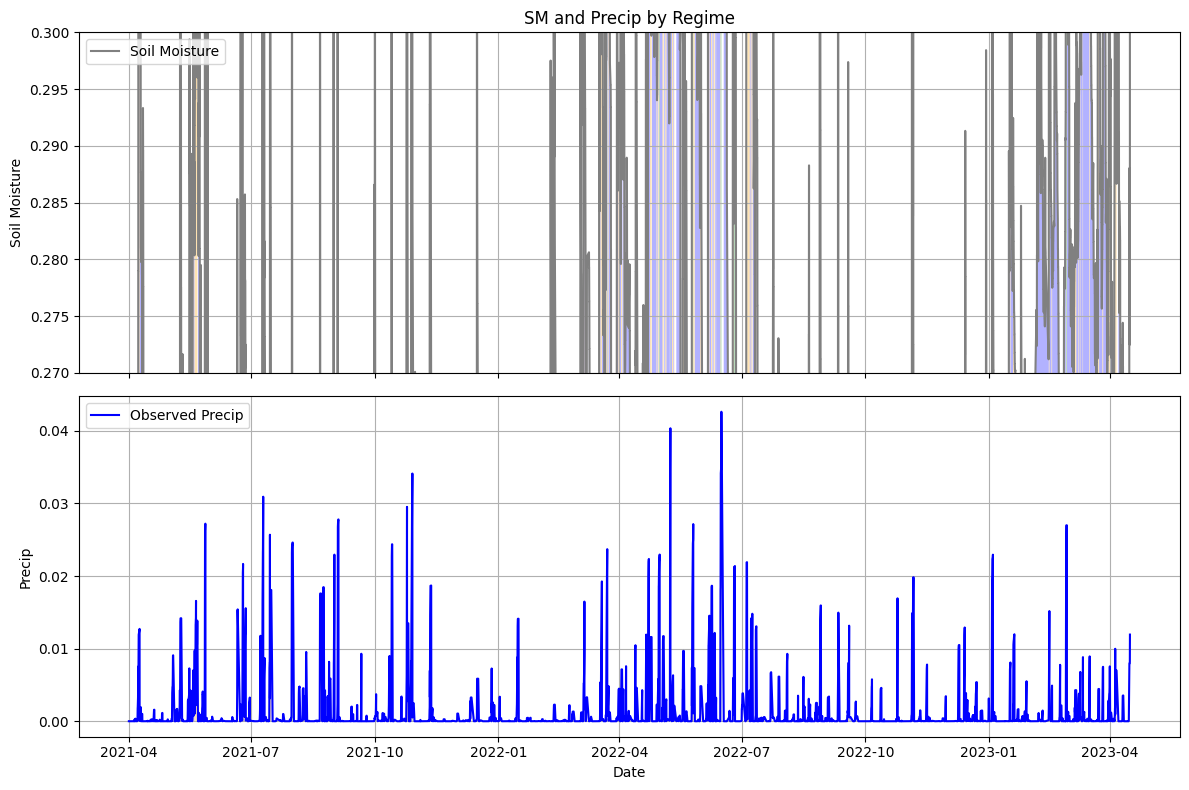

In [50]:
soil_data = sm[(sm['latitude'] == 41.948936) & (sm['longitude'] == -93.687760)]
soil_moist = soil_data['soil_moisture']
soil_moist = soil_moist.reindex(precipitation['tp'].index, method='nearest')
soil_moist = soil_moist.loc[precipitation['tp'].index]

combine = pd.DataFrame({
    'precipitation': precipitation['tp'].values,
    'state': states_seq,
    'soil_moisture': soil_moist.values
}, index=precipitation['tp'].index)


start, end = '2021-04-01', '2023-04-15'
plot_data = combine.loc[start:end]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax1.plot(plot_data.index, plot_data['soil_moisture'], label='Soil Moisture', color='grey')
ax1.set_ylim(0.27, 0.3)
ax1.set_ylabel('Soil Moisture')
ax1.set_title('SM and Precip by Regime')
colours = {1: 'blue', 2: 'orange', 3: 'green'}
for state in plot_data['state'].unique():
    mask = plot_data['state'] == state
    ax1.fill_between(plot_data.index, 0, plot_data['soil_moisture'], where=mask, 
                     facecolor=colours[state], alpha=0.3)

ax1.grid(True)
ax2.plot(plot_data.index, plot_data['precipitation'], label='Observed Precip', color='blue')
ax2.set_ylabel('Precip')
ax2.set_xlabel('Date')

for state in plot_data['state'].unique():
    mask = plot_data['state'] == state
    ax2.fill_between(plot_data.index, 0, plot_data['precipitation'], where=mask, 
                     facecolor=colours[state], alpha=0.3)

ax2.grid(True)
state_colour = [Patch(color=colours[state], label=f'State {state}') for state in colours]
ax1.legend(handles=ax1.get_legend_handles_labels()[0] + state_colour, loc='upper left')
ax2.legend(handles=ax2.get_legend_handles_labels()[0] + state_colour, loc='upper left')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


/var/folders/rl/9q_x7dw54pxf8fg3ycvj030c0000gn/T/ipykernel_33537/3082100738.py:19: RuntimeWarning: invalid value encountered in divide
  curve = (curve - minima) / (maxima - minima)


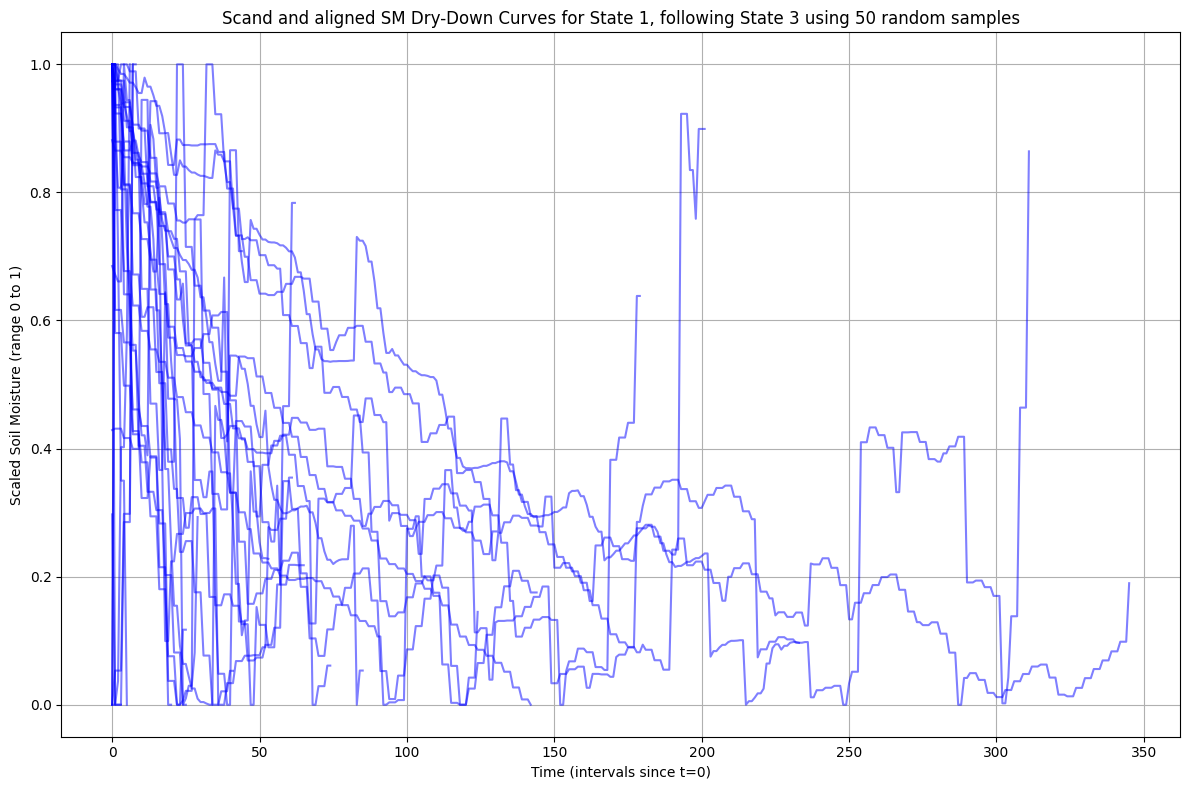

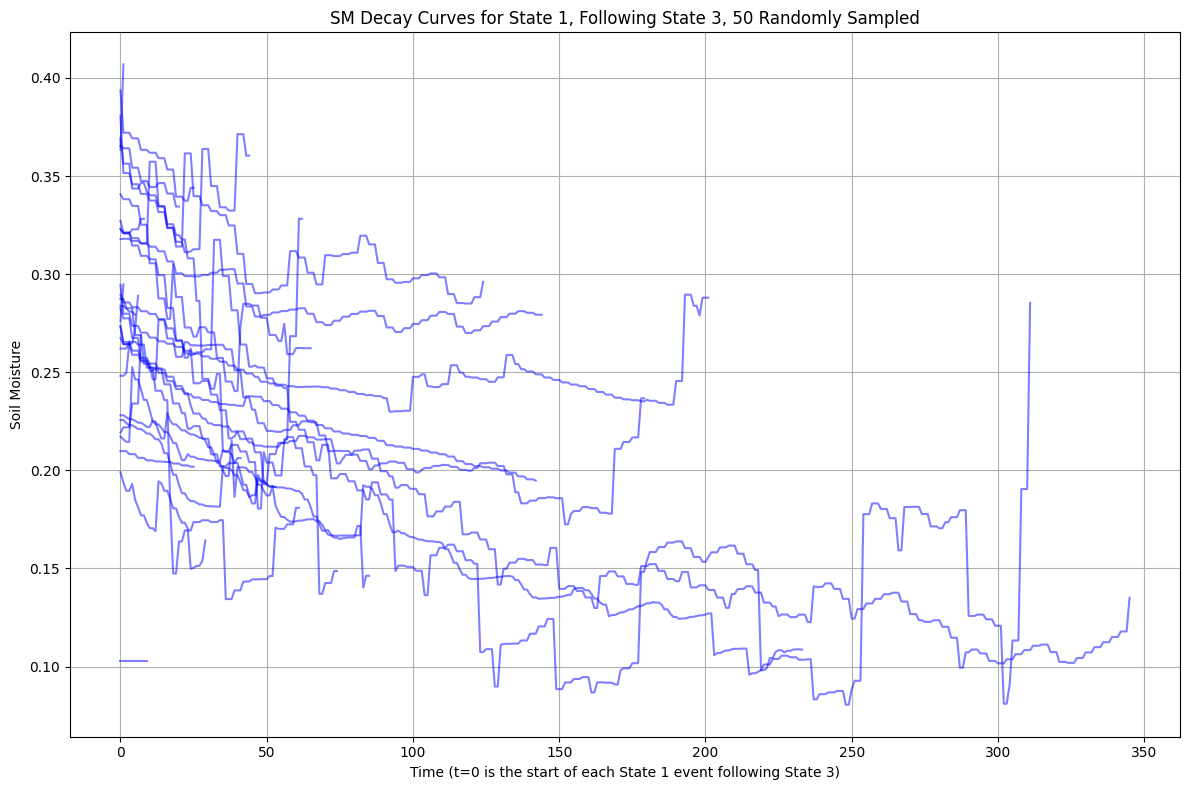

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

transition_indices = combine[(combine['state'].shift(1) == 3) & (combine['state'] == 1)].index
curves = []

for index in transition_indices:
    curve = []
    for i, (state, soil_moisture) in enumerate(zip(combine.loc[index:, 'state'], combine.loc[index:, 'soil_moisture'])):
        if state != 1:
            break
        curve.append(soil_moisture)
    curve = np.array(curve)

    if len(curve) > 1:
        minima = np.min(curve)
        maxima = np.max(curve)
        curve = (curve - minima) / (maxima - minima)

    curves.append(curve)

if len(curves) > 50:
    sampled_indices = np.random.choice(len(curves), 50, replace=False)
    aligned_curves_sampled = [aligned_curves[i] for i in sampled_indices]
else:
    aligned_curves_sampled = curves

max_len = max(len(curve) for curve in aligned_curves_sampled)
aligned_curves_padded = [np.pad(curve, (0, max_len - len(curve)), 'constant', constant_values=np.nan) for curve in aligned_curves_sampled]
aligned_curves_df = pd.DataFrame(aligned_curves_padded).T

plt.figure(figsize=(12, 8))
for i in range(aligned_curves_df.shape[1]):
    plt.plot(aligned_curves_df.index, aligned_curves_df.iloc[:, i], color='blue', alpha=0.5)

plt.title('Scand and aligned SM Dry-Down Curves for State 1, following State 3 using 50 random samples')
plt.xlabel('Time (intervals since t=0)')
plt.ylabel('Scaled Soil Moisture (range 0 to 1)')
plt.grid(True)
plt.tight_layout()
plt.show()

transition_indices = combine[(combine['state'].shift(1) == 3) & (combine['state'] == 1)].index
aligned_curves = []

for index in transition_indices:
    curve = []
    for i, (state, soil_moisture) in enumerate(zip(combine.loc[index:, 'state'], combine.loc[index:, 'soil_moisture'])):
        if state != 1:
            break
        curve.append(soil_moisture)
    
    aligned_curves.append(np.array(curve))

if len(aligned_curves) > 50:
    sampled_indices = np.random.choice(len(aligned_curves), 50, replace=False)
    aligned_curves_sampled = [aligned_curves[i] for i in sampled_indices]
else:
    aligned_curves_sampled = aligned_curves

max_len = max(len(curve) for curve in aligned_curves_sampled)

aligned_curves_padded = [np.pad(curve, (0, max_len - len(curve)), 'constant', constant_values=np.nan) for curve in aligned_curves_sampled]

aligned_curves_df = pd.DataFrame(aligned_curves_padded).T

plt.figure(figsize=(12, 8))
for i in range(aligned_curves_df.shape[1]):
    plt.plot(aligned_curves_df.index, aligned_curves_df.iloc[:, i], color='blue', alpha=0.5)

plt.title('SM Decay Curves for State 1, Following State 3, 50 Randomly Sampled')
plt.xlabel('Time (t=0 is the start of each State 1 event following State 3)')
plt.ylabel('Soil Moisture')
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:

def exp_decay(t, alpha0, alpha1, gamma):
    return alpha0 + alpha1 * np.exp(-gamma * t)

params = []
r2_scores = []

for i in range(aligned_curves_df.shape[1]):
    curve = aligned_curves_df.iloc[:, i].dropna().values
    time = np.arange(len(curve))
    
    if len(curve) >= 3:
        try:
            popt, _ = curve_fit(exp_decay, time, curve, p0=(1, 1, 0.1))
            params.append(popt)
            predicted_curve = exp_decay(time, *popt)
            r2 = r2_score(curve, predicted_curve)
            r2_scores.append(r2)
        except RuntimeError as e:
            params.append([np.nan, np.nan, np.nan])
            r2_scores.append(np.nan)
    else:
        params.append([np.nan, np.nan, np.nan])
        r2_scores.append(np.nan)

params_df = pd.DataFrame(params, columns=['alpha0', 'alpha1', 'gamma'])
params_df['r2_score'] = r2_scores

print(params_df[['alpha0', 'alpha1', 'gamma', 'r2_score']])


        alpha0        alpha1     gamma  r2_score
0          NaN           NaN       NaN       NaN
1     0.234136  9.919169e-02  0.004573  0.471241
2     0.145541  1.503531e-01  0.060515  0.789463
3     0.263154  9.259604e-02  0.078298  0.809449
4     0.146985  1.356399e-01  0.023321  0.980763
5          NaN           NaN       NaN       NaN
6     0.102792 -4.109366e-10  0.087493  0.000000
7     0.200135  1.013388e-02  0.063300  0.969414
8     0.192737  7.635558e-02  0.023264  0.812466
9     0.125686  2.057777e-01  0.015937  0.684455
10   12.639922 -1.237340e+01 -0.000074  0.599971
11         NaN           NaN       NaN       NaN
12         NaN           NaN       NaN       NaN
13    0.187374  4.746311e-02  0.073669  0.730475
14   -0.002491  2.304058e-01  0.003297  0.968592
15         NaN           NaN       NaN       NaN
16         NaN           NaN       NaN       NaN
17         NaN           NaN       NaN       NaN
18    0.330442  3.655547e-02  0.079452  0.911273
19    0.336337  3.80

/var/folders/rl/9q_x7dw54pxf8fg3ycvj030c0000gn/T/ipykernel_33537/1737378272.py:13: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exp_decay, time, curve, p0=(1, 1, 0.1))


Using dry down definitions from literature

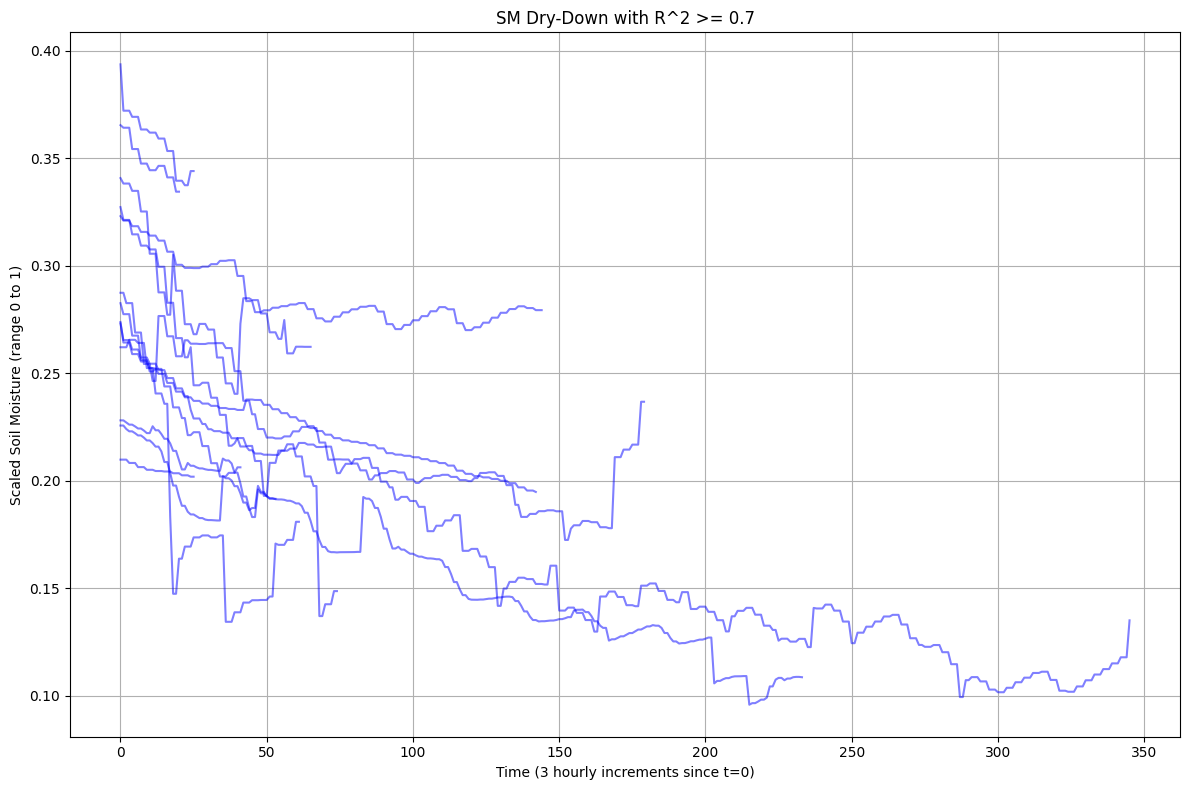

In [59]:
valid_drydowns = params_df.index[params_df['r2_score'] >= 0.7]

plt.figure(figsize=(12, 8))
for i in valid_drydowns:
    plt.plot(aligned_curves_df.index, aligned_curves_df.iloc[:, i], color='blue', alpha=0.5)

plt.title('SM Dry-Down with R^2 >= 0.7')
plt.xlabel('Time (3 hourly increments since t=0)')
plt.ylabel('Scaled Soil Moisture (range 0 to 1)')
plt.grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Decay Params: alpha_0=0.2740618635439203, alpha_1=0.05311690953264732, gamma_i=0.03016445351122316
Decay Params: alpha_0=0.1927370019508082, alpha_1=0.07635557580031323, gamma_i=0.023264054036412574
Decay Params: alpha_0=0.263153999349522, alpha_1=0.09259603842580842, gamma_i=0.07829768045390526
Decay Params: alpha_0=0.14698489167530723, alpha_1=0.13563994011306302, gamma_i=0.02332144766186554
Decay Params: alpha_0=0.09405297949512956, alpha_1=0.196404368792269, gamma_i=0.00751926750160857


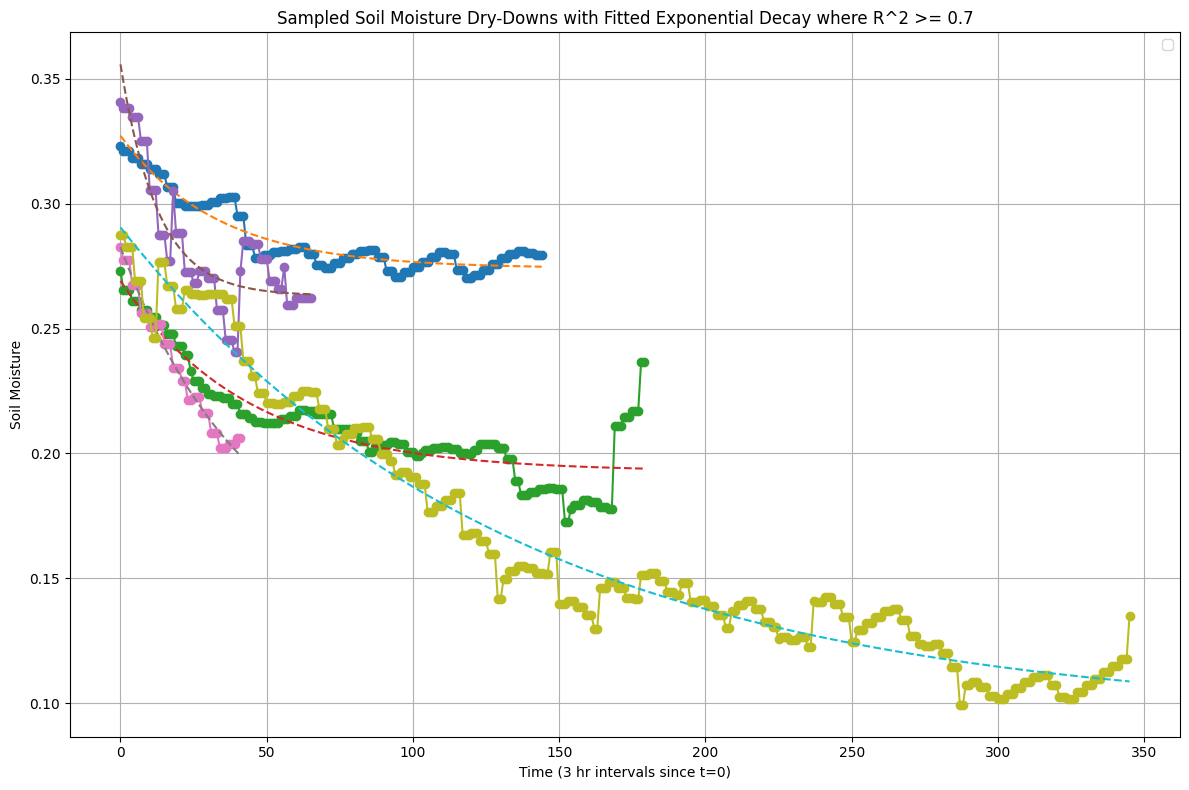

In [71]:
if len(valid_drydowns) > 5:
    sampled_indices = np.random.choice(valid_drydowns, 5, replace=False)
else:
    sampled_indices = valid_drydowns

plt.figure(figsize=(12, 8))
for i in sampled_indices:
    curve = aligned_curves_df.iloc[:, i].dropna().values
    time = np.arange(len(curve))
    plt.plot(time, curve, linestyle='-', marker='o')
    popt = params_df.iloc[i, :3].values
    print(f'Decay Params: alpha_0={popt[0]}, alpha_1={popt[1]}, gamma_i={popt[2]}')
    fitted_curve = exp_decay(time, *popt)
    plt.plot(time, fitted_curve, linestyle='--')

plt.title('Sampled Soil Moisture Dry-Downs with Fitted Exponential Decay where R^2 >= 0.7')
plt.xlabel('Time (3 hr intervals since t=0)')
plt.ylabel('Soil Moisture')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Resolution Analysis

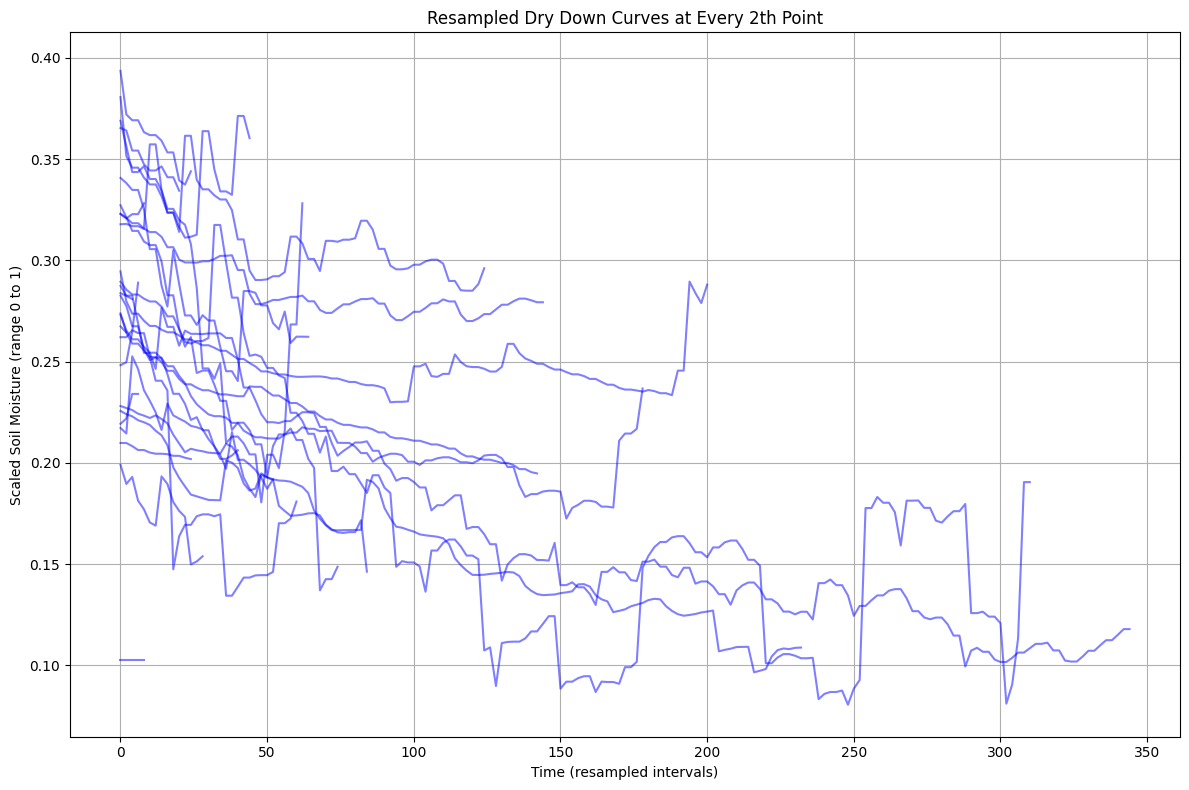

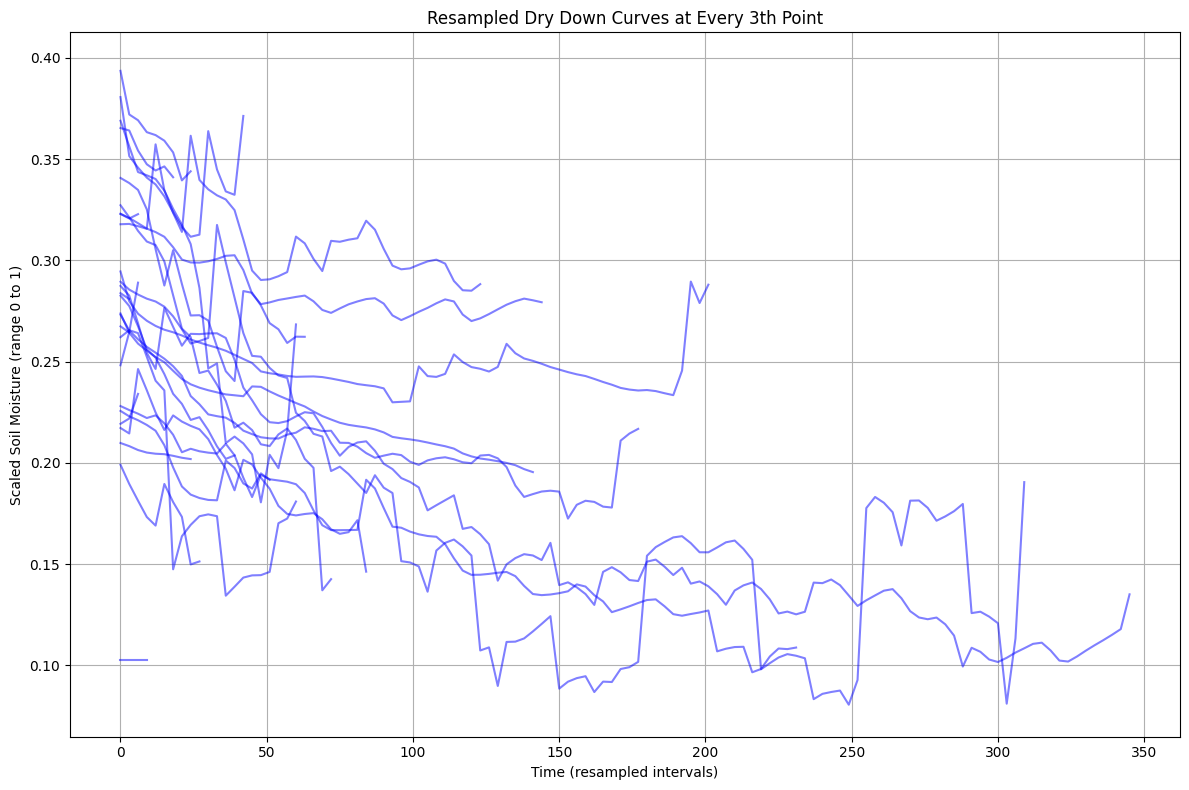

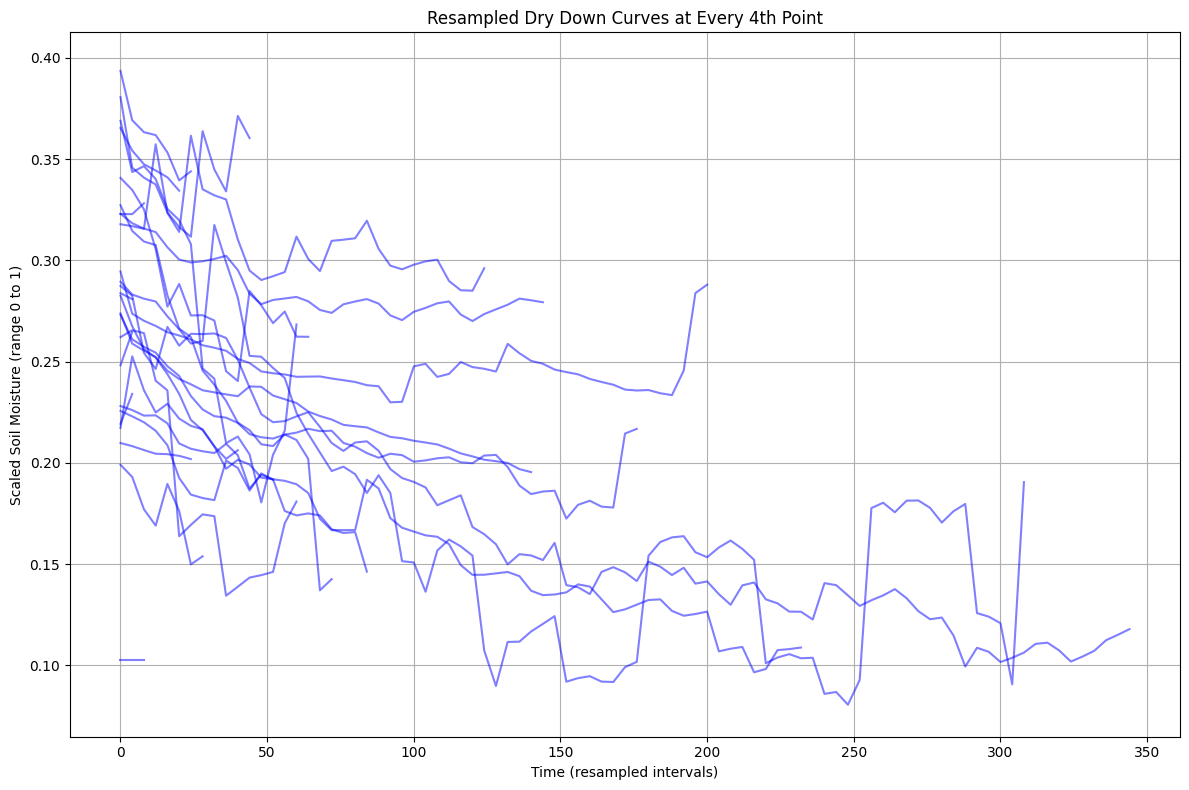

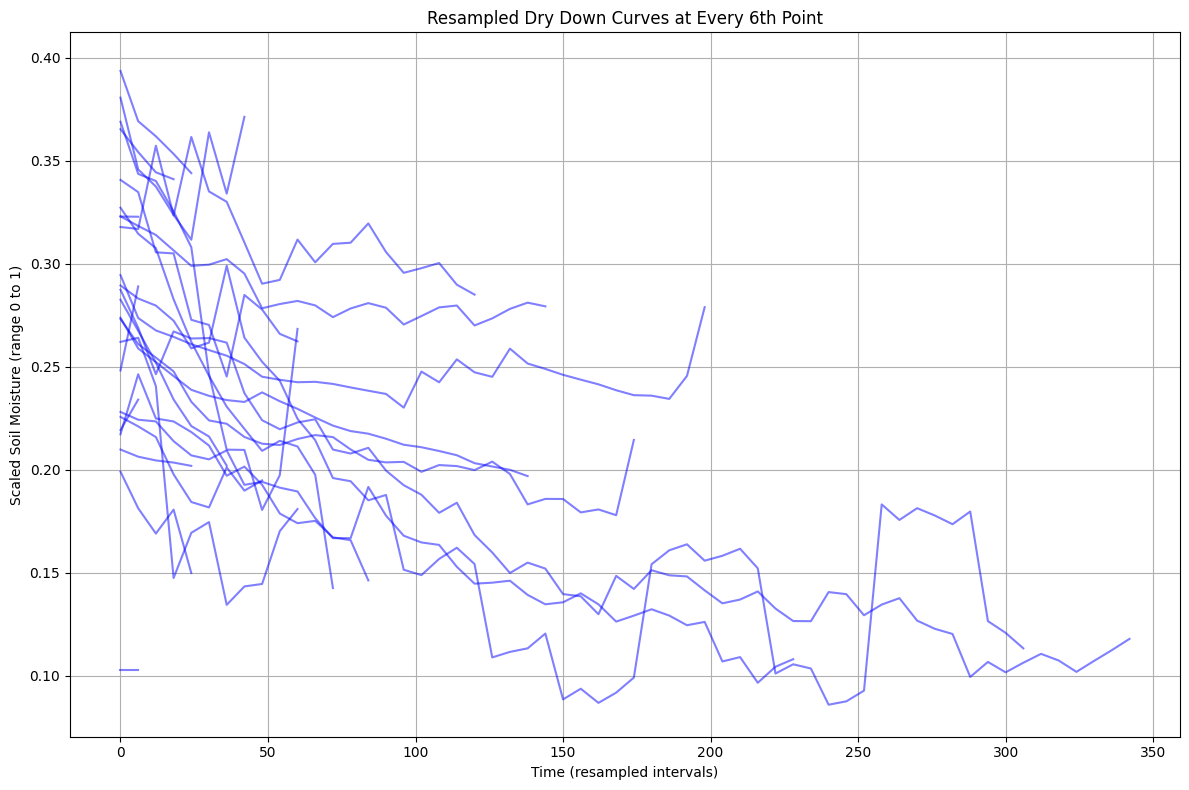

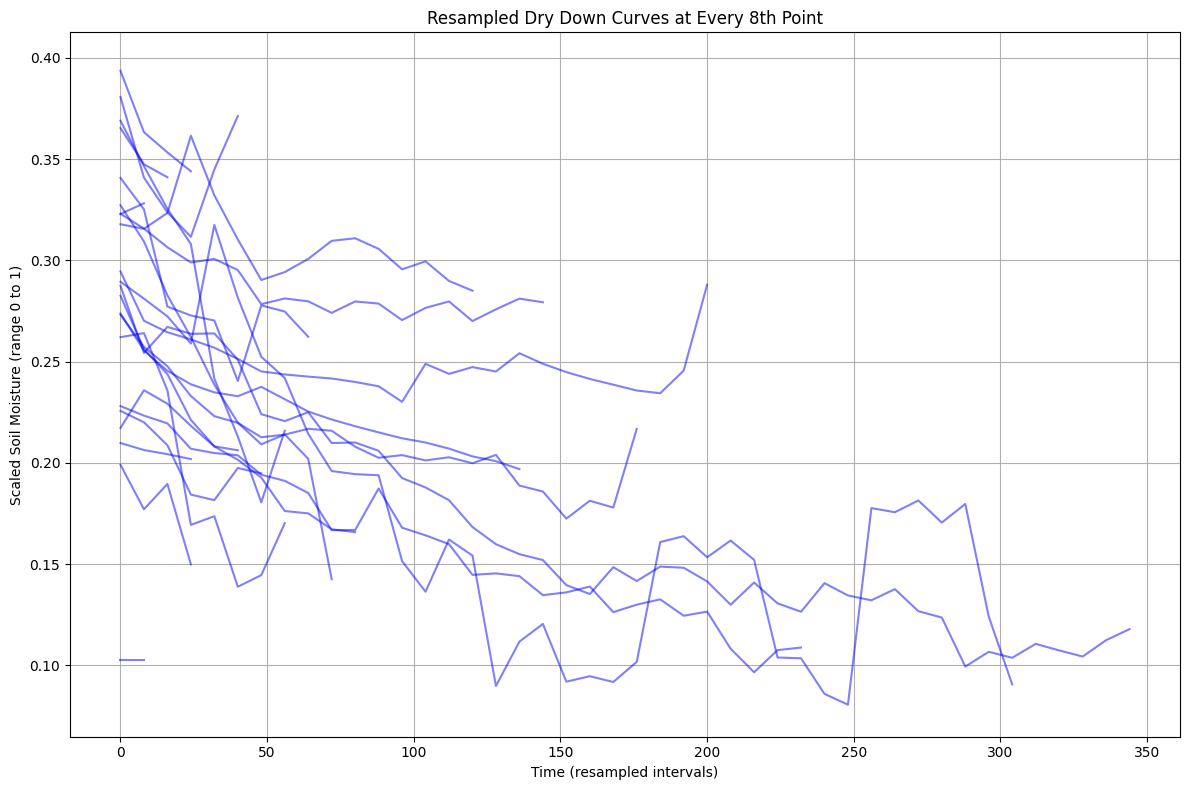

In [78]:
aligned_curves_df = pd.DataFrame(aligned_curves_padded).T  


resample_factors = [2, 3, 4, 6, 8]  
def resampleCurve(curve_df, factor):
    return curve_df.iloc[::factor]


for factor in resample_factors:
    resampled_curves = aligned_curves_df.apply(resampleCurve, axis=0, factor=factor)
    
    plt.figure(figsize=(12, 8))
    for i in range(resampled_curves.shape[1]):
        plt.plot(resampled_curves.index, resampled_curves.iloc[:, i], color='blue', alpha=0.5)
    plt.title(f'Resampled Dry Down Curves at Every {factor}th Point')
    plt.xlabel('Time (resampled intervals)')
    plt.ylabel('Scaled Soil Moisture (range 0 to 1)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/var/folders/rl/9q_x7dw54pxf8fg3ycvj030c0000gn/T/ipykernel_33537/2000512069.py:21: RuntimeWarning: invalid value encountered in divide
  curve = (curve - min_value) / (max_value - min_value)


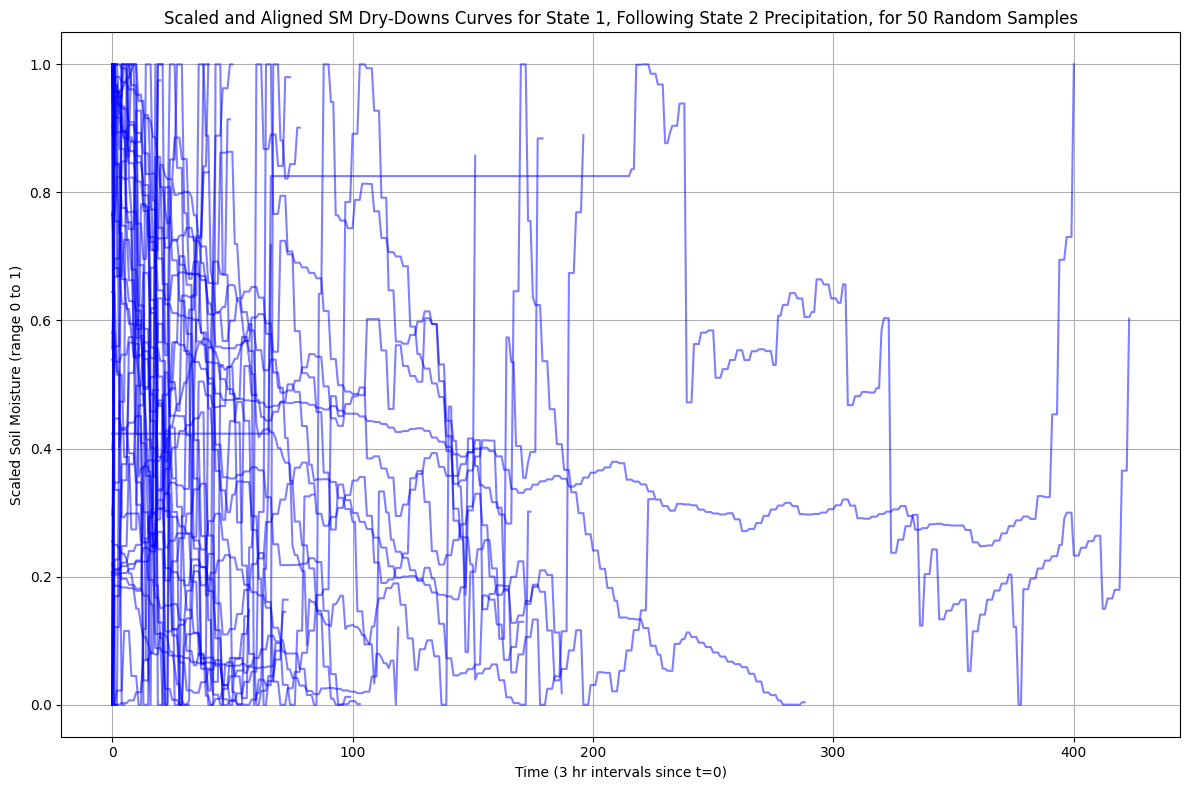

Alpha_0 range across events:
Min: 0.04749336, Max: 0.44951802
Mean alpha_0: 0.22, Max: 0.28
Decay rate statistics:
Min: nan, Max: nan, Mean: nan, Std: nan
Slow_decay: 189 curves
Medium_decay: 17 curves
Fast_decay: 28 curves


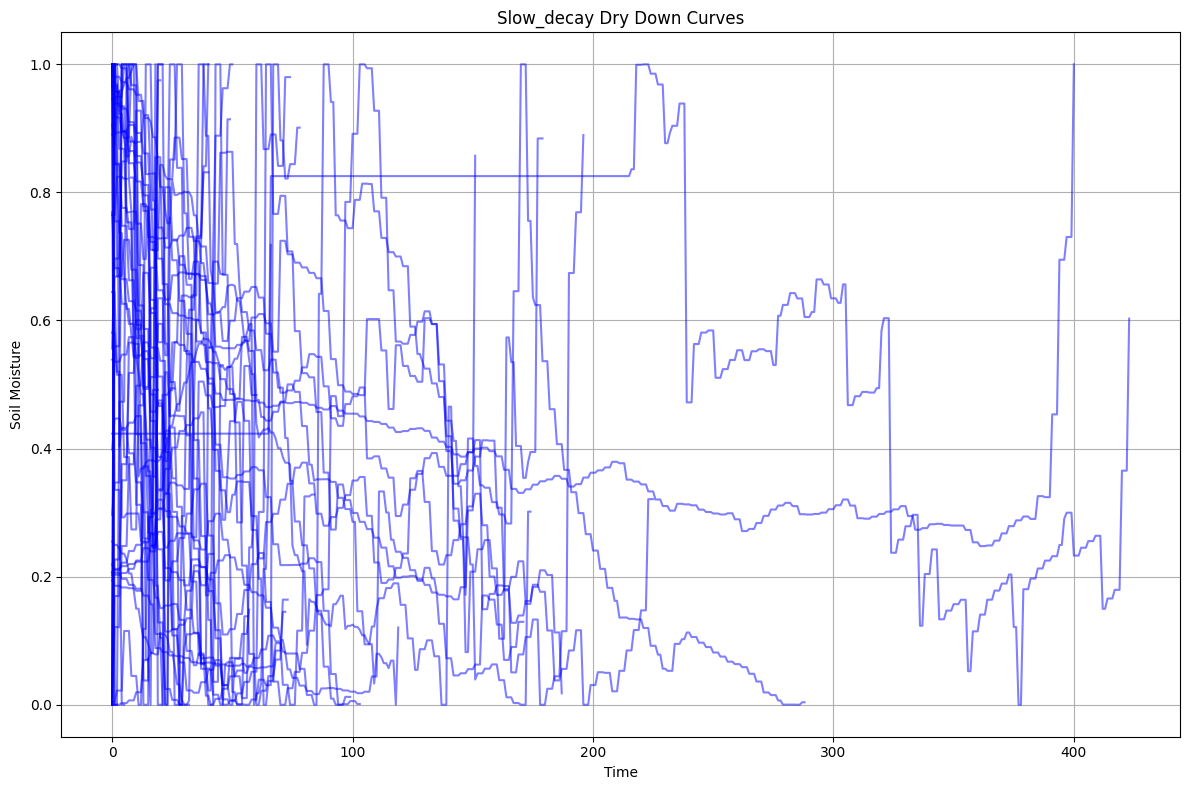

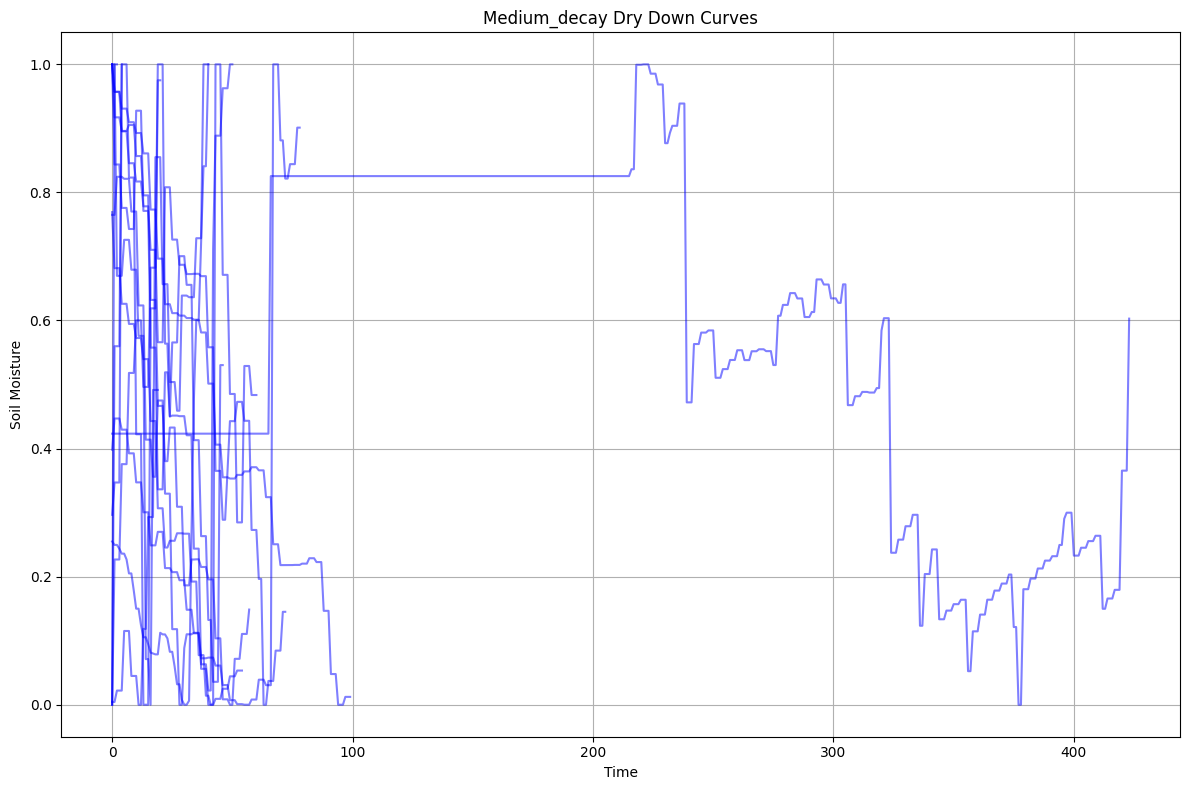

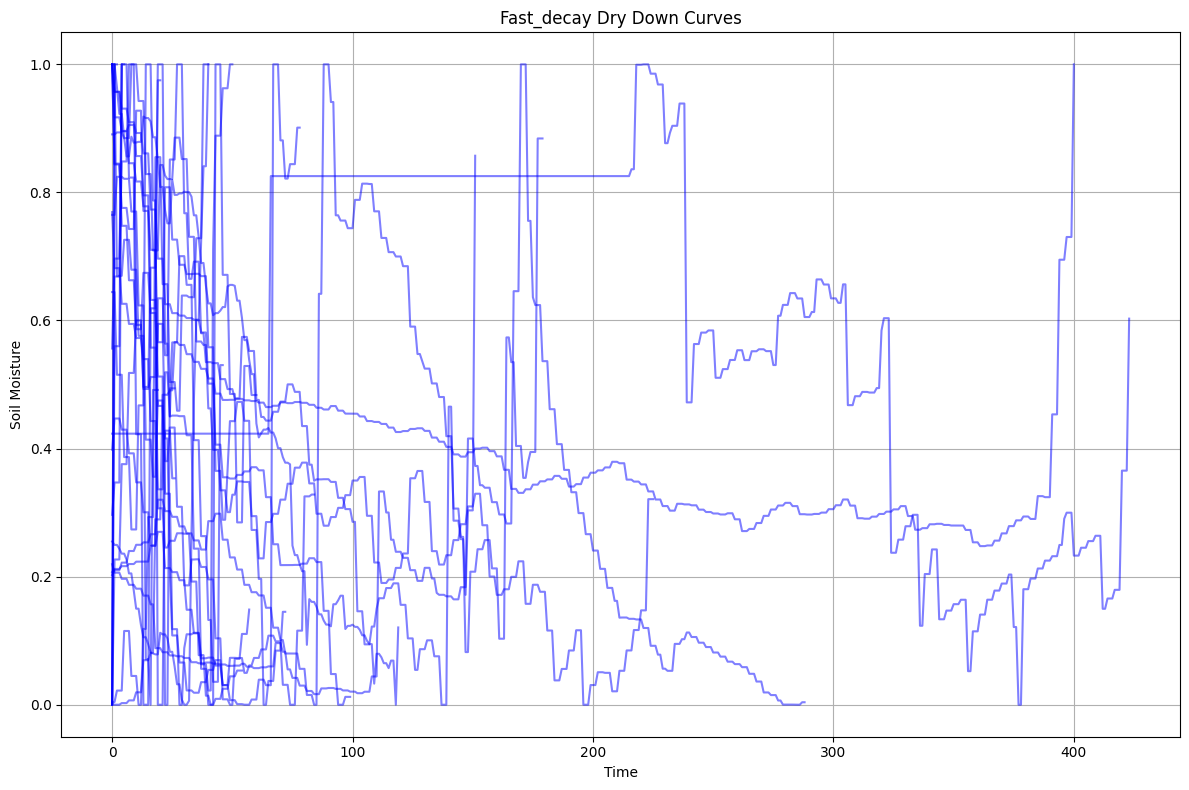

In [74]:
def find_transition_indices(df, from_state, to_state=1):
    return df[(df['state'].shift(1) == from_state) & (df['state'] == to_state)].index

def extract_normalised_curves(df, indices, target_state=1):
    curves = []
    starting_values = []
    decay_params = []

    for index in indices:
        curve = []
        
        for state, soil_moisture in zip(df.loc[index:, 'state'], df.loc[index:, 'soil_moisture']):
            if state != target_state:
                break
            curve.append(soil_moisture)

        curve = np.array(curve)

        if len(curve) > 1:
            min_value, max_value = np.min(curve), np.max(curve)
            curve = (curve - min_value) / (max_value - min_value)
            starting_values.append((min_value, max_value))
            decay_rate = (curve[0] - curve[-1]) / len(curve)
            decay_params.append({'initial_value': curve[0], 'final_value': curve[-1], 'decay_rate': decay_rate})

        curves.append(curve)

    return curves, starting_values, decay_params

def sample_and_pad_curves(curves, sample_size=50):
    if len(curves) > sample_size:
        sampled_indices = np.random.choice(len(curves), sample_size, replace=False)
        curves = [curves[i] for i in sampled_indices]

    max_len = max(len(curve) for curve in curves)
    padded_curves = [np.pad(curve, (0, max_len - len(curve)), 'constant', constant_values=np.nan) for curve in curves]
    
    return pd.DataFrame(padded_curves).T

def plot_curves(df, title, xlabel, ylabel, curve_colour='blue', alpha=0.5):
    plt.figure(figsize=(12, 8))
    for i in range(df.shape[1]):
        plt.plot(df.index, df.iloc[:, i], color=curve_colour, alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def calculate_and_print_statistics(starting_values, decay_params):
    if starting_values:
        initial_min = np.array([x[0] for x in starting_values])
        initial_max = np.array([x[1] for x in starting_values])
        print(f"Alpha_0 range across events:\nMin: {initial_min.min()}, Max: {initial_max.max()}")
        print(f"Mean alpha_0: {initial_min.mean():.2f}, Max: {initial_max.mean():.2f}")

    if decay_params:
        decay_rate_values = [param['decay_rate'] for param in decay_params]
        print(f"Decay rate statistics:\nMin: {np.min(decay_rate_values)}, Max: {np.max(decay_rate_values)}, "
              f"Mean: {np.mean(decay_rate_values)}, Std: {np.std(decay_rate_values)}")

def categorise_and_plot_decay_curves(curves_df, decay_params):
    shape_categories = {
        'slow_decay': [],
        'medium_decay': [],
        'fast_decay': []
    }

    for param in decay_params:
        if param['decay_rate'] < 0.02:
            shape_categories['slow_decay'].append(param)
        elif 0.02 <= param['decay_rate'] <= 0.05:
            shape_categories['medium_decay'].append(param)
        else:
            shape_categories['fast_decay'].append(param)

    for decay_type, curves in shape_categories.items():
        print(f"{decay_type.capitalize()}: {len(curves)} curves")

    for decay_type, curves in shape_categories.items():
        if curves:
            plt.figure(figsize=(12, 8))
            plt.title(f'{decay_type.capitalize()} Dry Down Curves')
            
            num_curves = min(len(curves_df.columns), len(curves))
            for i in range(num_curves):
                plt.plot(curves_df.index, curves_df.iloc[:, i], color='blue', alpha=0.5)
            
            plt.xlabel('Time')
            plt.ylabel('Soil Moisture')
            plt.grid(True)
            plt.tight_layout()
            plt.show()

transition_indices = find_transition_indices(combine, from_state=2, to_state=1)
curves, starting_values, decay_params = extract_normalised_curves(combine, transition_indices, target_state=1)
aligned_curves_df = sample_and_pad_curves(curves)

plot_curves(aligned_curves_df,
            title='Scaled and Aligned SM Dry-Downs Curves for State 1, Following State 2 Precipitation, for 50 Random Samples',
            xlabel='Time (3 hr intervals since t=0)',
            ylabel='Scaled Soil Moisture (range 0 to 1)')

calculate_and_print_statistics(starting_values, decay_params)

categorise_and_plot_decay_curves(aligned_curves_df, decay_params)
